In [ ]:
# Standard Imports
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [ ]:
from datetime import datetime, timedelta
import pandas as pd

start_date = datetime(2021, 2, 7)

# Define the end date (Feb 26, 2022)
end_date = datetime(2022, 2, 26)

# Initialize the current date as the start date
current_date = start_date

# Define a timedelta of 7 days to increment by one week
one_week = timedelta(days=7)

# Create an empty list to store the data
data = []

# Loop to generate epiweeks and week numbers
while current_date <= end_date:
    # Calculate the epiweek and week number
    epiweek = current_date.strftime("%U")
    week_number = current_date.strftime("%W")
    date_str = current_date.strftime("%Y-%m-%d")

    # Append the epiweek, week number, and date to the list
    data.append([epiweek, week_number, date_str])

    # Increment the current date by one week
    current_date += one_week

# Create a DataFrame from the list
epiweeks_df = pd.DataFrame(data, columns=['Epiweek Number', 'Week Number', 'Date'])

epiweeks_df


,Epiweek Number,Week Number,Date
0,06,05,2021-02-07
1,07,06,2021-02-14
2,08,07,2021-02-21
3,09,08,2021-02-28
4,10,09,2021-03-07
5,11,10,2021-03-14
6,12,11,2021-03-21
7,13,12,2021-03-28
8,14,13,2021-04-04
9,15,14,2021-04-11


In [ ]:
epiweeks_df = epiweeks_df.drop(columns= 'Week Number' )
epiweeks_df

,Epiweek Number,Date
0,06,2021-02-07
1,07,2021-02-14
2,08,2021-02-21
3,09,2021-02-28
4,10,2021-03-07
5,11,2021-03-14
6,12,2021-03-21
7,13,2021-03-28
8,14,2021-04-04
9,15,2021-04-11


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import os
import re

# Define the folder path containing your CSV files
folder_path = '/content/drive/MyDrive/Final_delta_clade_ay_level_variants'

# Initialize an empty DataFrame to store the combined data
master_df = pd.DataFrame()

# List all files in the directory
all_files = os.listdir(folder_path)

# Define your custom order of run numbers
custom_order = ['1523', '1524', '1525', '4605', '1527', '1530', '1532', '1534', '1536', '1538', '003', '004', '006', '007', '1543', '010', '4732','013', '015', '016', '018', '019', '020', '021', '022', '024', '027', '031', '033', '035','038', '042', '043', '047', '050', '052', '055', '057', '059', '062', '063', '065', '067', '070', '073', '076']

# Function to extract the run number from a filename
def extract_run_number(filename):
    match = re.search(r'run(\d+)_', filename)
    return match.group(1) if match else '9999'  # Return a high number if no match

# Sort the files based on custom order
sorted_files = sorted(all_files, key=lambda x: custom_order.index(extract_run_number(x)) if extract_run_number(x) in custom_order else 9999)

# Process each file in sorted order
for file in sorted_files:
    file_path = os.path.join(folder_path, file)
    if os.path.isfile(file_path) and file.endswith('.csv'):
        df = pd.read_csv(file_path)
        df['date'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m-%d')


        # Concatenate the DataFrame to the master DataFrame
        master_df = pd.concat([master_df, df], ignore_index=True)

# Define the path for the master file
master_file = '/content/drive/MyDrive/Final_delta_clade_ay_level_variants/Master_File.xlsx'

# Save the combined data to the master file
master_df.to_excel(master_file, index=False)


In [ ]:
path = '/content/drive/MyDrive/Final_delta_clade_ay_level_variants/Master_File.xlsx'

In [ ]:
master_rundf = pd.read_excel(path)
master_rundf

,sample_name,run_id,Location,date,SampleType,Log GC/L,Flow_Rate,gc/l,gc/d,Delta_21A,...,Delta_21J_level2,Delta_21A_gc/d,Delta_21I_gc/d,Delta_21J_gc/d,Delta_21A_level_1_gc/d,Delta_21I_level_1_gc/d,Delta_21J_level_1_gc/d,Delta_21A_level_2_gc/d,Delta_21I_level_2_gc/d,Delta_21J_level_2_gc/d
0,ALB-Inf-1-28-21-A,run1523,Albany,2021-01-28,Influent,4.212,57651642.0,16292.960326,9.393159e+11,0.0,...,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.0
1,AST-Inf-12-10-20-A,run1523,Astoria,2020-12-10,Influent,4.118,15482286.0,13121.998990,2.031585e+11,0.0,...,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.0
2,BD-Inf-1-28-21-A,run1523,Bend,2021-01-28,Influent,4.132,23431626.0,13551.894124,3.175429e+11,0.0,...,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.0
3,BD-Inf-2-1-21-A,run1523,Bend,2021-02-01,Influent,4.478,23734458.0,30060.763026,7.134759e+11,0.0,...,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.0
4,CAN-Inf-2-3-21-A,run1523,Canby,2021-02-03,Influent,4.890,3785400.0,77624.711663,2.938406e+11,0.0,...,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2156,SR-Inf-3-1-22-A,run076,Sunriver,2022-03-01,Influent,4.646,1287036.0,44258.837236,5.696272e+10,0.0,...,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.0
2157,STA-Inf-3-1-22-A,run076,Stayton,2022-03-01,Influent,4.383,7002990.0,24154.608344,1.691545e+11,0.0,...,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.0
2158,STHEL-Inf-2-24-22-A,run076,St. Helens,2022-02-24,Influent,4.862,5526684.0,72777.980454,4.022209e+11,0.0,...,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.0
2159,STHEL-Inf-2-28-22-A,run076,St. Helens,2022-02-28,Influent,4.003,39898116.0,10069.316689,4.017468e+11,0.0,...,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.0


In [ ]:
master_run_epiweek_df = master_df.join(epiweeks_df)

master_run_epiweek_df

,sample_name,run_id,Location,date,SampleType,Log GC/L,Flow_Rate,gc/l,gc/d,Delta_21A,...,Delta_21I_gc/d,Delta_21J_gc/d,Delta_21A_level_1_gc/d,Delta_21I_level_1_gc/d,Delta_21J_level_1_gc/d,Delta_21A_level_2_gc/d,Delta_21I_level_2_gc/d,Delta_21J_level_2_gc/d,Epiweek Number,Date
0,ALB-Inf-1-28-21-A,run1523,Albany,2021-01-28,Influent,4.212,57651642.0,16292.960326,9.393159e+11,0.0,...,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.0,06,2021-02-07
1,AST-Inf-12-10-20-A,run1523,Astoria,2020-12-10,Influent,4.118,15482286.0,13121.998990,2.031585e+11,0.0,...,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.0,07,2021-02-14
2,BD-Inf-1-28-21-A,run1523,Bend,2021-01-28,Influent,4.132,23431626.0,13551.894124,3.175429e+11,0.0,...,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.0,08,2021-02-21
3,BD-Inf-2-1-21-A,run1523,Bend,2021-02-01,Influent,4.478,23734458.0,30060.763026,7.134759e+11,0.0,...,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.0,09,2021-02-28
4,CAN-Inf-2-3-21-A,run1523,Canby,2021-02-03,Influent,4.890,3785400.0,77624.711663,2.938406e+11,0.0,...,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.0,10,2021-03-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2156,SR-Inf-3-1-22-A,run076,Sunriver,2022-03-01,Influent,4.646,1287036.0,44258.837236,5.696272e+10,0.0,...,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.0,NaN,NaN
2157,STA-Inf-3-1-22-A,run076,Stayton,2022-03-01,Influent,4.383,7002990.0,24154.608344,1.691545e+11,0.0,...,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.0,NaN,NaN
2158,STHEL-Inf-2-24-22-A,run076,St. Helens,2022-02-24,Influent,4.862,5526684.0,72777.980454,4.022209e+11,0.0,...,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.0,NaN,NaN
2159,STHEL-Inf-2-28-22-A,run076,St. Helens,2022-02-28,Influent,4.003,39898116.0,10069.316689,4.017468e+11,0.0,...,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.0,NaN,NaN


In [ ]:
master_run_epiweek_df.rename(columns={'date': 'Sample_Date', 'Date': 'Start_Date'}, inplace=True)
master_run_epiweek_df

,sample_name,run_id,Location,Sample_Date,SampleType,Log GC/L,Flow_Rate,gc/l,gc/d,Delta_21A,...,Delta_21I_gc/d,Delta_21J_gc/d,Delta_21A_level_1_gc/d,Delta_21I_level_1_gc/d,Delta_21J_level_1_gc/d,Delta_21A_level_2_gc/d,Delta_21I_level_2_gc/d,Delta_21J_level_2_gc/d,Epiweek Number,Start_Date
0,ALB-Inf-1-28-21-A,run1523,Albany,2021-01-28,Influent,4.212,57651642.0,16292.960326,9.393159e+11,0.0,...,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.0,06,2021-02-07
1,AST-Inf-12-10-20-A,run1523,Astoria,2020-12-10,Influent,4.118,15482286.0,13121.998990,2.031585e+11,0.0,...,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.0,07,2021-02-14
2,BD-Inf-1-28-21-A,run1523,Bend,2021-01-28,Influent,4.132,23431626.0,13551.894124,3.175429e+11,0.0,...,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.0,08,2021-02-21
3,BD-Inf-2-1-21-A,run1523,Bend,2021-02-01,Influent,4.478,23734458.0,30060.763026,7.134759e+11,0.0,...,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.0,09,2021-02-28
4,CAN-Inf-2-3-21-A,run1523,Canby,2021-02-03,Influent,4.890,3785400.0,77624.711663,2.938406e+11,0.0,...,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.0,10,2021-03-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2156,SR-Inf-3-1-22-A,run076,Sunriver,2022-03-01,Influent,4.646,1287036.0,44258.837236,5.696272e+10,0.0,...,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.0,NaN,NaN
2157,STA-Inf-3-1-22-A,run076,Stayton,2022-03-01,Influent,4.383,7002990.0,24154.608344,1.691545e+11,0.0,...,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.0,NaN,NaN
2158,STHEL-Inf-2-24-22-A,run076,St. Helens,2022-02-24,Influent,4.862,5526684.0,72777.980454,4.022209e+11,0.0,...,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.0,NaN,NaN
2159,STHEL-Inf-2-28-22-A,run076,St. Helens,2022-02-28,Influent,4.003,39898116.0,10069.316689,4.017468e+11,0.0,...,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.0,NaN,NaN


In [ ]:
master_run_epiweek_df['corresponding_samples'] = ""
master_run_epiweek_df['corresponding_gc/d'] = ""

# Iterate through the rows of the dataframe
for i in range(len(master_run_epiweek_df)):
    # Check if the current row has a valid date and if it's not the last row
    if not pd.isnull(master_run_epiweek_df['Start_Date'].iloc[i]) and i < len(master_run_epiweek_df) - 1:
        # Get the current and next dates
        curr_date = pd.to_datetime(master_run_epiweek_df['Start_Date'].iloc[i])
        next_date = pd.to_datetime(master_run_epiweek_df['Start_Date'].iloc[i + 1])

        # Create lists to store the corresponding sample names and gc/d values
        corresponding_samples = []
        corresponding_gc_d = []

        # Iterate through the dataframe again to find corresponding sample names and gc/d values
        for j in range(len(master_run_epiweek_df)):
            if not pd.isnull(master_run_epiweek_df['Sample_Date'].iloc[j]):
                sample_date = pd.to_datetime(master_run_epiweek_df['Sample_Date'].iloc[j])
                if curr_date <= sample_date < next_date:
                    corresponding_samples.append(master_run_epiweek_df['sample_name'].iloc[j])
                    corresponding_gc_d.append(master_run_epiweek_df['gc/d'].iloc[j])

        # Store the lists of corresponding sample names and gc/d values in the new columns
        master_run_epiweek_df.at[i, 'corresponding_samples'] = ', '.join(corresponding_samples)
        master_run_epiweek_df.at[i, 'corresponding_gc/d'] = ', '.join(map(str, corresponding_gc_d))

print(master_run_epiweek_df)

              sample_name   run_id    Location Sample_Date SampleType  \
0       ALB-Inf-1-28-21-A  run1523      Albany  2021-01-28   Influent   
1      AST-Inf-12-10-20-A  run1523     Astoria  2020-12-10   Influent   
2        BD-Inf-1-28-21-A  run1523        Bend  2021-01-28   Influent   
3         BD-Inf-2-1-21-A  run1523        Bend  2021-02-01   Influent   
4        CAN-Inf-2-3-21-A  run1523       Canby  2021-02-03   Influent   
...                   ...      ...         ...         ...        ...   
2156      SR-Inf-3-1-22-A   run076    Sunriver  2022-03-01   Influent   
2157     STA-Inf-3-1-22-A   run076     Stayton  2022-03-01   Influent   
2158  STHEL-Inf-2-24-22-A   run076  St. Helens  2022-02-24   Influent   
2159  STHEL-Inf-2-28-22-A   run076  St. Helens  2022-02-28   Influent   
2160   STHEL-Inf-3-2-22-A   run076  St. Helens  2022-03-02   Influent   

      Log GC/L   Flow_Rate          gc/l          gc/d  Delta_21A  ...  \
0        4.212  57651642.0  16292.960326  9.39315

In [ ]:
master_run_epiweek_df.to_excel("Corresponding_columns_dates_delta_clade_ay.xlsx", index=False)

In [ ]:
import numpy as np
master_run_epiweek_df['Start_Date'] = pd.to_datetime(master_run_epiweek_df['Start_Date'])
master_run_epiweek_df['Sample_Date'] = pd.to_datetime(master_run_epiweek_df['Sample_Date'])

# iterate through the rows of the dataframe
for i in range(len(master_run_epiweek_df)):
    # check if the current row has a valid date and if it's not the last row
    if not pd.isnull(master_run_epiweek_df['Start_Date'].iloc[i]) and i < len(master_run_epiweek_df)-1:
        # get the current and next dates
        curr_date = master_run_epiweek_df['Start_Date'].iloc[i]
        next_date = master_run_epiweek_df['Start_Date'].iloc[i+1]

        # get the sum of gc/d for sample dates that lie between the current and next dates
        gc_d_sum = 0
        for j in range(len(master_run_epiweek_df)):
            if not pd.isnull(master_run_epiweek_df['Sample_Date'].iloc[j]):
                sample_date = master_run_epiweek_df['Sample_Date'].iloc[j]
                if curr_date <= sample_date < next_date:
                    gc_d_sum += master_run_epiweek_df['gc/d'].iloc[j]

        # store the sum of gc/d in the gc/d_sum column for the current row
        master_run_epiweek_df.at[i, 'gc/d_sum'] = gc_d_sum

print(master_run_epiweek_df)


              sample_name   run_id    Location Sample_Date SampleType  \
0       ALB-Inf-1-28-21-A  run1523      Albany  2021-01-28   Influent   
1      AST-Inf-12-10-20-A  run1523     Astoria  2020-12-10   Influent   
2        BD-Inf-1-28-21-A  run1523        Bend  2021-01-28   Influent   
3         BD-Inf-2-1-21-A  run1523        Bend  2021-02-01   Influent   
4        CAN-Inf-2-3-21-A  run1523       Canby  2021-02-03   Influent   
...                   ...      ...         ...         ...        ...   
2156      SR-Inf-3-1-22-A   run076    Sunriver  2022-03-01   Influent   
2157     STA-Inf-3-1-22-A   run076     Stayton  2022-03-01   Influent   
2158  STHEL-Inf-2-24-22-A   run076  St. Helens  2022-02-24   Influent   
2159  STHEL-Inf-2-28-22-A   run076  St. Helens  2022-02-28   Influent   
2160   STHEL-Inf-3-2-22-A   run076  St. Helens  2022-03-02   Influent   

      Log GC/L   Flow_Rate          gc/l          gc/d  Delta_21A  ...  \
0        4.212  57651642.0  16292.960326  9.39315

In [ ]:
master_run_epiweek_df.to_excel('/content/GC_Dsum_delta_ay.xlsx', index= False)

In [ ]:
import numpy as np

# iterate through the rows of the dataframe
for i in range(len(master_run_epiweek_df)):
    # check if the current row has a valid date and if it's not the last row
    if not pd.isnull(master_run_epiweek_df['Start_Date'].iloc[i]) and i < len(master_run_epiweek_df)-1:
        # get the current and next dates
        curr_date = master_run_epiweek_df['Start_Date'].iloc[i]
        next_date = master_run_epiweek_df['Start_Date'].iloc[i+1]

        # get the sum of gc/d for sample dates that lie between the current and next dates
        Delta_21A_gc_d_sum = 0
        Delta_21I_gc_d_sum =0
        Delta_21J_gc_d_sum =0
        for j in range(len(master_run_epiweek_df)):
            if not pd.isnull(master_run_epiweek_df['Sample_Date'].iloc[j]):
                sample_date = master_run_epiweek_df['Sample_Date'].iloc[j]
                if curr_date <= sample_date < next_date:
                    Delta_21A_gc_d_sum += master_run_epiweek_df['Delta_21A_gc/d'].iloc[j]
                    Delta_21I_gc_d_sum += master_run_epiweek_df['Delta_21I_gc/d'].iloc[j]
                    Delta_21J_gc_d_sum += master_run_epiweek_df['Delta_21J_gc/d'].iloc[j]

        # store the sum of gc/d in the gc/d_sum column for the current row
        master_run_epiweek_df.at[i, 'Delta_21A_gc/d_sum'] = Delta_21A_gc_d_sum
        master_run_epiweek_df.at[i, 'Delta_21I_gc/d_sum'] = Delta_21I_gc_d_sum
        master_run_epiweek_df.at[i, 'Delta_21J_gc/d_sum'] = Delta_21J_gc_d_sum

print(master_run_epiweek_df)

              sample_name   run_id    Location Sample_Date SampleType  \
0       ALB-Inf-1-28-21-A  run1523      Albany  2021-01-28   Influent   
1      AST-Inf-12-10-20-A  run1523     Astoria  2020-12-10   Influent   
2        BD-Inf-1-28-21-A  run1523        Bend  2021-01-28   Influent   
3         BD-Inf-2-1-21-A  run1523        Bend  2021-02-01   Influent   
4        CAN-Inf-2-3-21-A  run1523       Canby  2021-02-03   Influent   
...                   ...      ...         ...         ...        ...   
2156      SR-Inf-3-1-22-A   run076    Sunriver  2022-03-01   Influent   
2157     STA-Inf-3-1-22-A   run076     Stayton  2022-03-01   Influent   
2158  STHEL-Inf-2-24-22-A   run076  St. Helens  2022-02-24   Influent   
2159  STHEL-Inf-2-28-22-A   run076  St. Helens  2022-02-28   Influent   
2160   STHEL-Inf-3-2-22-A   run076  St. Helens  2022-03-02   Influent   

      Log GC/L   Flow_Rate          gc/l          gc/d  Delta_21A  ...  \
0        4.212  57651642.0  16292.960326  9.39315

In [ ]:
master_run_epiweek_df.to_csv("21_clade_gc_d.csv", index =False)

In [ ]:
import numpy as np

# iterate through the rows of the dataframe
for i in range(len(master_run_epiweek_df)):
    # check if the current row has a valid date and if it's not the last row
    if not pd.isnull(master_run_epiweek_df['Start_Date'].iloc[i]) and i < len(master_run_epiweek_df)-1:
        # get the current and next dates
        curr_date = master_run_epiweek_df['Start_Date'].iloc[i]
        next_date = master_run_epiweek_df['Start_Date'].iloc[i+1]

        # get the sum of gc/d for sample dates that lie between the current and next dates
        Delta_21A_level_1_gc_d_sum = 0
        Delta_21I_level_1_gc_d_sum = 0
        Delta_21J_level_1_gc_d_sum = 0

        for j in range(len(master_run_epiweek_df)):
            if not pd.isnull(master_run_epiweek_df['Sample_Date'].iloc[j]):
                sample_date = master_run_epiweek_df['Sample_Date'].iloc[j]
                if curr_date <= sample_date < next_date:
                    Delta_21A_level_1_gc_d_sum += master_run_epiweek_df['Delta_21A_level_1_gc/d'].iloc[j]
                    Delta_21I_level_1_gc_d_sum += master_run_epiweek_df['Delta_21I_level_1_gc/d'].iloc[j]
                    Delta_21J_level_1_gc_d_sum += master_run_epiweek_df['Delta_21J_level_1_gc/d'].iloc[j]

        # store the sum of gc/d in the gc/d_sum column for the current row
        master_run_epiweek_df.at[i, 'Delta_21A_level_1_gc/d_sum'] = Delta_21A_level_1_gc_d_sum
        master_run_epiweek_df.at[i, 'Delta_21I_level_1_gc/d_sum'] = Delta_21I_level_1_gc_d_sum
        master_run_epiweek_df.at[i, 'Delta_21J_level_1_gc/d_sum'] = Delta_21J_level_1_gc_d_sum


print(master_run_epiweek_df)

              sample_name   run_id    Location Sample_Date SampleType  \
0       ALB-Inf-1-28-21-A  run1523      Albany  2021-01-28   Influent   
1      AST-Inf-12-10-20-A  run1523     Astoria  2020-12-10   Influent   
2        BD-Inf-1-28-21-A  run1523        Bend  2021-01-28   Influent   
3         BD-Inf-2-1-21-A  run1523        Bend  2021-02-01   Influent   
4        CAN-Inf-2-3-21-A  run1523       Canby  2021-02-03   Influent   
...                   ...      ...         ...         ...        ...   
2156      SR-Inf-3-1-22-A   run076    Sunriver  2022-03-01   Influent   
2157     STA-Inf-3-1-22-A   run076     Stayton  2022-03-01   Influent   
2158  STHEL-Inf-2-24-22-A   run076  St. Helens  2022-02-24   Influent   
2159  STHEL-Inf-2-28-22-A   run076  St. Helens  2022-02-28   Influent   
2160   STHEL-Inf-3-2-22-A   run076  St. Helens  2022-03-02   Influent   

      Log GC/L   Flow_Rate          gc/l          gc/d  Delta_21A  ...  \
0        4.212  57651642.0  16292.960326  9.39315

In [ ]:
master_run_epiweek_df.to_csv("21_clade_gc_d_level_one.csv", index =False)

In [ ]:
import numpy as np

# iterate through the rows of the dataframe
for i in range(len(master_run_epiweek_df)):
    # check if the current row has a valid date and if it's not the last row
    if not pd.isnull(master_run_epiweek_df['Start_Date'].iloc[i]) and i < len(master_run_epiweek_df)-1:
        # get the current and next dates
        curr_date = master_run_epiweek_df['Start_Date'].iloc[i]
        next_date = master_run_epiweek_df['Start_Date'].iloc[i+1]

        # get the sum of gc/d for sample dates that lie between the current and next dates
        Delta_21A_level_2_gc_d_sum = 0
        Delta_21I_level_2_gc_d_sum = 0
        Delta_21J_level_2_gc_d_sum = 0

        for j in range(len(master_run_epiweek_df)):
            if not pd.isnull(master_run_epiweek_df['Sample_Date'].iloc[j]):
                sample_date = master_run_epiweek_df['Sample_Date'].iloc[j]
                if curr_date <= sample_date < next_date:
                    Delta_21A_level_2_gc_d_sum += master_run_epiweek_df['Delta_21A_level_2_gc/d'].iloc[j]
                    Delta_21I_level_2_gc_d_sum += master_run_epiweek_df['Delta_21I_level_2_gc/d'].iloc[j]
                    Delta_21J_level_2_gc_d_sum += master_run_epiweek_df['Delta_21J_level_2_gc/d'].iloc[j]

        # store the sum of gc/d in the gc/d_sum column for the current row
        master_run_epiweek_df.at[i, 'Delta_21A_level_2_gc/d_sum'] = Delta_21A_level_2_gc_d_sum
        master_run_epiweek_df.at[i, 'Delta_21I_level_2_gc/d_sum'] = Delta_21I_level_2_gc_d_sum
        master_run_epiweek_df.at[i, 'Delta_21J_level_2_gc/d_sum'] = Delta_21J_level_2_gc_d_sum


print(master_run_epiweek_df)

              sample_name   run_id    Location Sample_Date SampleType  \
0       ALB-Inf-1-28-21-A  run1523      Albany  2021-01-28   Influent   
1      AST-Inf-12-10-20-A  run1523     Astoria  2020-12-10   Influent   
2        BD-Inf-1-28-21-A  run1523        Bend  2021-01-28   Influent   
3         BD-Inf-2-1-21-A  run1523        Bend  2021-02-01   Influent   
4        CAN-Inf-2-3-21-A  run1523       Canby  2021-02-03   Influent   
...                   ...      ...         ...         ...        ...   
2156      SR-Inf-3-1-22-A   run076    Sunriver  2022-03-01   Influent   
2157     STA-Inf-3-1-22-A   run076     Stayton  2022-03-01   Influent   
2158  STHEL-Inf-2-24-22-A   run076  St. Helens  2022-02-24   Influent   
2159  STHEL-Inf-2-28-22-A   run076  St. Helens  2022-02-28   Influent   
2160   STHEL-Inf-3-2-22-A   run076  St. Helens  2022-03-02   Influent   

      Log GC/L   Flow_Rate          gc/l          gc/d  Delta_21A  ...  \
0        4.212  57651642.0  16292.960326  9.39315

In [ ]:
master_run_epiweek_df.to_excel('All lineages Sum_delta_ay.xlsx', index=False)

In [ ]:
# List of columns to include
columns_to_include = ['Epiweek Number', 'Start_Date', 'gc/d_sum', 'Delta_21A_gc/d_sum', 'Delta_21A_level_1_gc/d_sum','Delta_21A_level_2_gc/d_sum','Delta_21I_gc/d_sum','Delta_21I_level_1_gc/d_sum', 'Delta_21I_level_2_gc/d_sum', 'Delta_21J_gc/d_sum', 'Delta_21J_level_1_gc/d_sum', 'Delta_21J_level_2_gc/d_sum']

# Create the new dataframe with the specified columns
lineages_df = master_run_epiweek_df[columns_to_include].copy()

# Display the new dataframe
lineages_df


,Epiweek Number,Start_Date,gc/d_sum,Delta_21A_gc/d_sum,Delta_21A_level_1_gc/d_sum,Delta_21A_level_2_gc/d_sum,Delta_21I_gc/d_sum,Delta_21I_level_1_gc/d_sum,Delta_21I_level_2_gc/d_sum,Delta_21J_gc/d_sum,Delta_21J_level_1_gc/d_sum,Delta_21J_level_2_gc/d_sum
0,06,2021-02-07,1.436577e+13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,07,2021-02-14,4.031267e+11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,08,2021-02-21,4.903644e+12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,09,2021-02-28,1.686143e+13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10,2021-03-07,2.154243e+13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2156,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2157,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2158,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2159,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
lineages_df.dropna(inplace=True)
lineages_df


,Epiweek Number,Start_Date,gc/d_sum,Delta_21A_gc/d_sum,Delta_21A_level_1_gc/d_sum,Delta_21A_level_2_gc/d_sum,Delta_21I_gc/d_sum,Delta_21I_level_1_gc/d_sum,Delta_21I_level_2_gc/d_sum,Delta_21J_gc/d_sum,Delta_21J_level_1_gc/d_sum,Delta_21J_level_2_gc/d_sum
0,06,2021-02-07,1.436577e+13,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,07,2021-02-14,4.031267e+11,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,08,2021-02-21,4.903644e+12,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,09,2021-02-28,1.686143e+13,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,10,2021-03-07,2.154243e+13,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
5,11,2021-03-14,1.752764e+13,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
6,12,2021-03-21,2.020958e+13,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
7,13,2021-03-28,2.184643e+13,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
8,14,2021-04-04,4.114500e+13,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
9,15,2021-04-11,4.475415e+13,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [ ]:
lineages_df['Delta_21A%'] = lineages_df['Delta_21A_gc/d_sum'] / lineages_df['gc/d_sum']
lineages_df['Delta_21A_level_1%'] = lineages_df['Delta_21A_level_1_gc/d_sum'] / lineages_df['gc/d_sum']
lineages_df['Delta_21A_level_2%'] = lineages_df['Delta_21A_level_2_gc/d_sum'] / lineages_df['gc/d_sum']

lineages_df['Delta_21I%'] = lineages_df['Delta_21I_gc/d_sum'] / lineages_df['gc/d_sum']
lineages_df['Delta_21I_level_1%'] = lineages_df['Delta_21I_level_1_gc/d_sum'] / lineages_df['gc/d_sum']
lineages_df['Delta_21I_level_2%'] = lineages_df['Delta_21I_level_2_gc/d_sum'] / lineages_df['gc/d_sum']

lineages_df['Delta_21J%'] = lineages_df['Delta_21J_gc/d_sum'] / lineages_df['gc/d_sum']
lineages_df['Delta_21J_level_1%'] = lineages_df['Delta_21J_level_1_gc/d_sum'] / lineages_df['gc/d_sum']
lineages_df['Delta_21J_level_2%'] = lineages_df['Delta_21J_level_2_gc/d_sum'] / lineages_df['gc/d_sum']

lineages_df

,Epiweek Number,Start_Date,gc/d_sum,Delta_21A_gc/d_sum,Delta_21A_level_1_gc/d_sum,Delta_21A_level_2_gc/d_sum,Delta_21I_gc/d_sum,Delta_21I_level_1_gc/d_sum,Delta_21I_level_2_gc/d_sum,Delta_21J_gc/d_sum,...,Delta_21J_level_2_gc/d_sum,Delta_21A%,Delta_21A_level_1%,Delta_21A_level_2%,Delta_21I%,Delta_21I_level_1%,Delta_21I_level_2%,Delta_21J%,Delta_21J_level_1%,Delta_21J_level_2%
0,06,2021-02-07,1.436577e+13,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,07,2021-02-14,4.031267e+11,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,08,2021-02-21,4.903644e+12,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,09,2021-02-28,1.686143e+13,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,10,2021-03-07,2.154243e+13,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,11,2021-03-14,1.752764e+13,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,12,2021-03-21,2.020958e+13,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,13,2021-03-28,2.184643e+13,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,14,2021-04-04,4.114500e+13,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,15,2021-04-11,4.475415e+13,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
path_gisaid = '/content/Delta_clade21_all_levels_gisaid.csv'
gisaid_df = pd.read_csv(path_gisaid)
gisaid_df

,date,freq_delta_21A,freq_delta_21A_level_1,freq_delta_21I,freq_delta_21I_level_1,freq_delta_21I_level_2,freq_delta_21J,freq_delta_21J_level_1,freq_delta_21J_level_2,freq,delta_21A_percentage,delta_21A_level_1_percentage,delta_21I_percentage,delta_21I_level_1_percentage,delta_21I_level_2_percentage,delta_21J_percentage,delta_21J_level_1_percentage,delta_21J_level_2_percentage
0,2021-02-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,180.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2021-02-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,181.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2021-02-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,2021-02-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,119.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,2021-03-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,172.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,2021-03-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,139.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,2021-03-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,173.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,2021-03-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,573.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,2021-04-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,303.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,2021-04-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,445.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
gisaid_df['date'] = pd.to_datetime(gisaid_df['date'])
lineages_df['Start_Date'] = pd.to_datetime(lineages_df['Start_Date'])

combined_study_df = pd.merge(gisaid_df, lineages_df, left_on='date', right_on='Start_Date', how='outer')


In [ ]:
combined_study_df

,date,freq_delta_21A,freq_delta_21A_level_1,freq_delta_21I,freq_delta_21I_level_1,freq_delta_21I_level_2,freq_delta_21J,freq_delta_21J_level_1,freq_delta_21J_level_2,freq,...,Delta_21J_level_2_gc/d_sum,Delta_21A%,Delta_21A_level_1%,Delta_21A_level_2%,Delta_21I%,Delta_21I_level_1%,Delta_21I_level_2%,Delta_21J%,Delta_21J_level_1%,Delta_21J_level_2%
0,2021-02-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,180.0,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2021-02-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,181.0,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2021-02-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150.0,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,2021-02-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,119.0,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,2021-03-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,172.0,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,2021-03-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,139.0,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,2021-03-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,173.0,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,2021-03-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,573.0,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,2021-04-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,303.0,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,2021-04-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,445.0,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
combined_study_df.drop(columns=['Start_Date'], inplace=True)
combined_study_df

,date,freq_delta_21A,freq_delta_21A_level_1,freq_delta_21I,freq_delta_21I_level_1,freq_delta_21I_level_2,freq_delta_21J,freq_delta_21J_level_1,freq_delta_21J_level_2,freq,...,Delta_21J_level_2_gc/d_sum,Delta_21A%,Delta_21A_level_1%,Delta_21A_level_2%,Delta_21I%,Delta_21I_level_1%,Delta_21I_level_2%,Delta_21J%,Delta_21J_level_1%,Delta_21J_level_2%
0,2021-02-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,180.0,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2021-02-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,181.0,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2021-02-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150.0,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,2021-02-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,119.0,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,2021-03-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,172.0,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,2021-03-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,139.0,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,2021-03-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,173.0,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,2021-03-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,573.0,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,2021-04-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,303.0,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,2021-04-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,445.0,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
column_order = ['Epiweek Number'] + [col for col in combined_study_df if col != 'Epiweek Number']
combined_study_df = combined_study_df[column_order]

In [ ]:
combined_study_df.to_csv("combined_study.csv", index = False)

#Correlation between GISAID and Freyja Wastewater

In [ ]:
columns_to_drop = ['freq_delta_21A', 'freq_delta_21I', 'freq_delta_21J','freq_delta_21A_level_1','freq_delta_21I_level_1','freq_delta_21J_level_1', 'freq_delta_21I_level_2', 'freq_delta_21J_level_2', 'freq','Delta_21A_gc/d_sum', 'Delta_21I_gc/d_sum', 'Delta_21J_gc/d_sum', 'Delta_21A_level_1_gc/d_sum', 'Delta_21I_level_1_gc/d_sum', 'Delta_21J_level_1_gc/d_sum', 'Delta_21A_level_2_gc/d_sum','Delta_21I_level_2_gc/d_sum', 'Delta_21J_level_2_gc/d_sum', 'Delta_21A_level_2%', 'gc/d_sum']  # Add other column names as needed
combined_study_cleandf = combined_study_df.drop(columns=columns_to_drop)
combined_study_cleandf

,Epiweek Number,date,delta_21A_percentage,delta_21A_level_1_percentage,delta_21I_percentage,delta_21I_level_1_percentage,delta_21I_level_2_percentage,delta_21J_percentage,delta_21J_level_1_percentage,delta_21J_level_2_percentage,Delta_21A%,Delta_21A_level_1%,Delta_21I%,Delta_21I_level_1%,Delta_21I_level_2%,Delta_21J%,Delta_21J_level_1%,Delta_21J_level_2%
0,06,2021-02-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,07,2021-02-14,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,08,2021-02-21,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,09,2021-02-28,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,10,2021-03-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,11,2021-03-14,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,12,2021-03-21,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,13,2021-03-28,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,14,2021-04-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,15,2021-04-11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


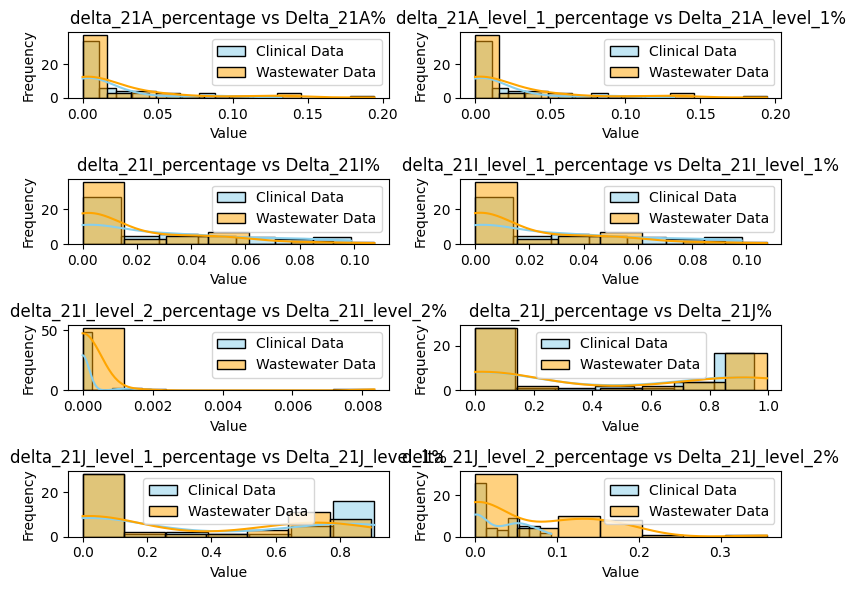

Shapiro-Wilk Test for delta_21A_percentage:
   p-value: 1.0
Shapiro-Wilk Test for Delta_21A%:
   p-value: 1.0
Shapiro-Wilk Test for delta_21A_level_1_percentage:
   p-value: 1.0
Shapiro-Wilk Test for Delta_21A_level_1%:
   p-value: 1.0
Shapiro-Wilk Test for delta_21I_percentage:
   p-value: 1.0
Shapiro-Wilk Test for Delta_21I%:
   p-value: 1.0
Shapiro-Wilk Test for delta_21I_level_1_percentage:
   p-value: 1.0
Shapiro-Wilk Test for Delta_21I_level_1%:
   p-value: 1.0
Shapiro-Wilk Test for delta_21I_level_2_percentage:
   p-value: 1.0
Shapiro-Wilk Test for Delta_21I_level_2%:
   p-value: 1.0
Shapiro-Wilk Test for delta_21J_percentage:
   p-value: 1.0
Shapiro-Wilk Test for Delta_21J%:
   p-value: 1.0
Shapiro-Wilk Test for delta_21J_level_1_percentage:
   p-value: 1.0
Shapiro-Wilk Test for Delta_21J_level_1%:
   p-value: 1.0
Shapiro-Wilk Test for delta_21J_level_2_percentage:
   p-value: 1.0
Shapiro-Wilk Test for Delta_21J_level_2%:
   p-value: 1.0


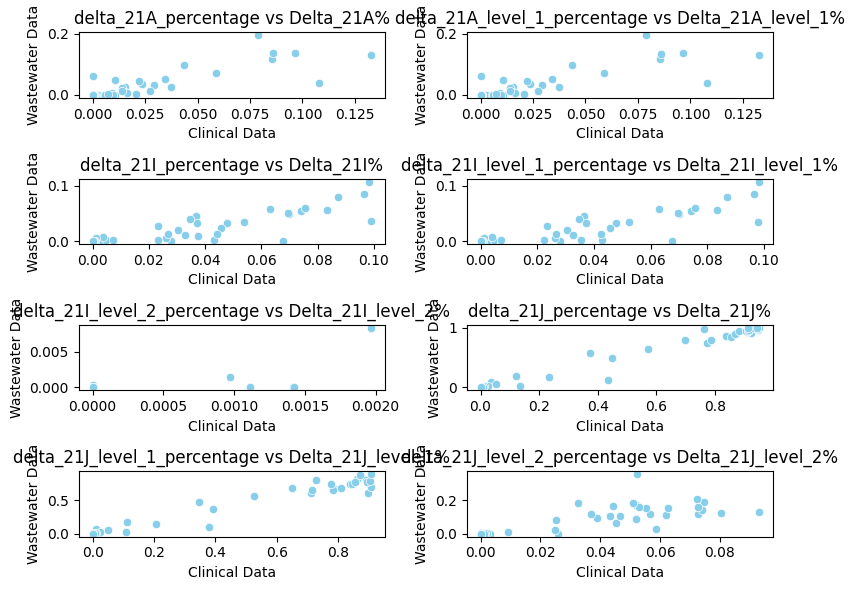

In [ ]:
import seaborn as sns
cli_columns = ['delta_21A_percentage', 'delta_21A_level_1_percentage', 'delta_21I_percentage','delta_21I_level_1_percentage', 'delta_21I_level_2_percentage','delta_21J_percentage', 'delta_21J_level_1_percentage','delta_21J_level_2_percentage']
ww_columns = ['Delta_21A%', 'Delta_21A_level_1%', 'Delta_21I%', 'Delta_21I_level_1%', 'Delta_21I_level_2%', 'Delta_21J%', 'Delta_21J_level_1%', 'Delta_21J_level_2%']

# Visual inspection of data distribution
plt.figure(figsize=(8, 6))
for i, (cli_col, ww_col) in enumerate(zip(cli_columns, ww_columns)):
    plt.subplot(4, 2, i + 1)
    sns.histplot(combined_study_cleandf[cli_col], color='skyblue', kde=True, label='Clinical Data')
    sns.histplot(combined_study_cleandf[ww_col], color='orange', kde=True, label='Wastewater Data')
    plt.title(f'{cli_col} vs {ww_col}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()

# Shapiro-Wilk test for normality
for cli_col, ww_col in zip(cli_columns, ww_columns):
    print(f"Shapiro-Wilk Test for {cli_col}:")
    stat_cli, p_cli = shapiro(combined_study_cleandf[cli_col])
    print(f"   p-value: {p_cli}")

    print(f"Shapiro-Wilk Test for {ww_col}:")
    stat_ww, p_ww = shapiro(combined_study_cleandf[ww_col])
    print(f"   p-value: {p_ww}")

# Scatter plots for linearity
plt.figure(figsize=(8, 6))
for i, (cli_col, ww_col) in enumerate(zip(cli_columns, ww_columns)):
    plt.subplot(4, 2, i + 1)
    sns.scatterplot(data=combined_study_cleandf, x=cli_col, y=ww_col, color='skyblue')
    plt.title(f'{cli_col} vs {ww_col}')
    plt.xlabel('Clinical Data')
    plt.ylabel('Wastewater Data')

plt.tight_layout()
plt.show()


In [ ]:
from scipy.stats import shapiro, kstest

# Shapiro-Wilk Test
def shapiro_test(data):
    stat, p_value = shapiro(data)
    print(f"Shapiro-Wilk Test:")
    print(f"Test Statistic: {stat}")
    print(f"P-value: {p_value}")
    alpha = 0.05
    if p_value > alpha:
        print("Sample looks Gaussian (fail to reject H0)")
    else:
        print("Sample does not look Gaussian (reject H0)")



# Apply tests to your data
for cli_col, ww_col in zip(cli_columns, ww_columns):
    print(f"Testing normality for {cli_col}:")
    shapiro_test(combined_study_cleandf[cli_col])


    print(f"Testing normality for {ww_col}:")
    shapiro_test(combined_study_cleandf[ww_col])



Testing normality for delta_21A_percentage:
Shapiro-Wilk Test:
Test Statistic: nan
P-value: 1.0
Sample looks Gaussian (fail to reject H0)
Testing normality for Delta_21A%:
Shapiro-Wilk Test:
Test Statistic: nan
P-value: 1.0
Sample looks Gaussian (fail to reject H0)
Testing normality for delta_21A_level_1_percentage:
Shapiro-Wilk Test:
Test Statistic: nan
P-value: 1.0
Sample looks Gaussian (fail to reject H0)
Testing normality for Delta_21A_level_1%:
Shapiro-Wilk Test:
Test Statistic: nan
P-value: 1.0
Sample looks Gaussian (fail to reject H0)
Testing normality for delta_21I_percentage:
Shapiro-Wilk Test:
Test Statistic: nan
P-value: 1.0
Sample looks Gaussian (fail to reject H0)
Testing normality for Delta_21I%:
Shapiro-Wilk Test:
Test Statistic: nan
P-value: 1.0
Sample looks Gaussian (fail to reject H0)
Testing normality for delta_21I_level_1_percentage:
Shapiro-Wilk Test:
Test Statistic: nan
P-value: 1.0
Sample looks Gaussian (fail to reject H0)
Testing normality for Delta_21I_level_1%

In [ ]:
combined_study_cleandf = combined_study_cleandf.dropna()
combined_study_cleandf

,Epiweek Number,date,delta_21A_percentage,delta_21A_level_1_percentage,delta_21I_percentage,delta_21I_level_1_percentage,delta_21I_level_2_percentage,delta_21J_percentage,delta_21J_level_1_percentage,delta_21J_level_2_percentage,Delta_21A%,Delta_21A_level_1%,Delta_21I%,Delta_21I_level_1%,Delta_21I_level_2%,Delta_21J%,Delta_21J_level_1%,Delta_21J_level_2%
0,06,2021-02-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,07,2021-02-14,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,08,2021-02-21,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,09,2021-02-28,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,10,2021-03-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,11,2021-03-14,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,12,2021-03-21,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,13,2021-03-28,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,14,2021-04-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,15,2021-04-11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
from scipy.stats import kstest, norm
for cli_col, ww_col in zip(cli_columns, ww_columns):
    print(f"Kolmogorov-Smirnov Test for {cli_col}:")
    # norm.cdf is the cumulative distribution function for a normal distribution
    stat_cli, p_cli = kstest(combined_study_cleandf[cli_col], 'norm', args=(combined_study_cleandf[cli_col].mean(), combined_study_cleandf[cli_col].std()))
    print(f"   p-value: {p_cli}")

    print(f"Kolmogorov-Smirnov Test for {ww_col}:")
    stat_ww, p_ww = kstest(combined_study_cleandf[ww_col], 'norm', args=(combined_study_cleandf[ww_col].mean(), combined_study_cleandf[ww_col].std()))
    print(f"   p-value: {p_ww}")


Kolmogorov-Smirnov Test for delta_21A_percentage:
   p-value: 0.0004643417077268017
Kolmogorov-Smirnov Test for Delta_21A%:
   p-value: 0.00016466362530494149
Kolmogorov-Smirnov Test for delta_21A_level_1_percentage:
   p-value: 0.0004643417077268017
Kolmogorov-Smirnov Test for Delta_21A_level_1%:
   p-value: 0.00016634529094982546
Kolmogorov-Smirnov Test for delta_21I_percentage:
   p-value: 0.0031101151742662925
Kolmogorov-Smirnov Test for Delta_21I%:
   p-value: 0.0015854330307458753
Kolmogorov-Smirnov Test for delta_21I_level_1_percentage:
   p-value: 0.003224688188157465
Kolmogorov-Smirnov Test for Delta_21I_level_1%:
   p-value: 0.000636441418004785
Kolmogorov-Smirnov Test for delta_21I_level_2_percentage:
   p-value: 1.5144592023621107e-14
Kolmogorov-Smirnov Test for Delta_21I_level_2%:
   p-value: 7.3711569865672e-12
Kolmogorov-Smirnov Test for delta_21J_percentage:
   p-value: 0.000545001857811922
Kolmogorov-Smirnov Test for Delta_21J%:
   p-value: 0.0007620686416122124
Kolmog

In [ ]:
# Shapiro-Wilk test for normality
for cli_col, ww_col in zip(cli_columns, ww_columns):
    print(f"Shapiro-Wilk Test for {cli_col}:")
    stat_cli, p_cli = shapiro(combined_study_cleandf[cli_col])
    print(f"   p-value: {p_cli}")

    print(f"Shapiro-Wilk Test for {ww_col}:")
    stat_ww, p_ww = shapiro(combined_study_cleandf[ww_col])
    print(f"   p-value: {p_ww}")

Shapiro-Wilk Test for delta_21A_percentage:
   p-value: 6.480266323549699e-10
Shapiro-Wilk Test for Delta_21A%:
   p-value: 1.9485328628388032e-10
Shapiro-Wilk Test for delta_21A_level_1_percentage:
   p-value: 6.480266323549699e-10
Shapiro-Wilk Test for Delta_21A_level_1%:
   p-value: 1.990069498081226e-10
Shapiro-Wilk Test for delta_21I_percentage:
   p-value: 9.571253940521274e-07
Shapiro-Wilk Test for Delta_21I%:
   p-value: 1.4713652518594245e-08
Shapiro-Wilk Test for delta_21I_level_1_percentage:
   p-value: 8.939377948991023e-07
Shapiro-Wilk Test for Delta_21I_level_1%:
   p-value: 1.1069093197590973e-08
Shapiro-Wilk Test for delta_21I_level_2_percentage:
   p-value: 3.631577189574381e-14
Shapiro-Wilk Test for Delta_21I_level_2%:
   p-value: 6.087151453466194e-16
Shapiro-Wilk Test for delta_21J_percentage:
   p-value: 2.2780310970915707e-08
Shapiro-Wilk Test for Delta_21J%:
   p-value: 1.432134144607744e-08
Shapiro-Wilk Test for delta_21J_level_1_percentage:
   p-value: 2.912061

In [ ]:
combined_data = np.concatenate([combined_study_cleandf['delta_21I_percentage'], combined_study_cleandf['Delta_21I_level_1%']])

# Now perform the Shapiro-Wilk test on the combined data
stat, p_value = shapiro(combined_data)

print(f"Shapiro-Wilk test statistic: {stat}")
print(f"p-value: {p_value}")

# Interpret the p-value
if p_value < 0.05:
    print("The combined data is not normally distributed (reject H0)")
else:
    print("The combined data is normally distributed (fail to reject H0)")

Shapiro-Wilk test statistic: 0.7775466442108154
p-value: 1.7095137805345217e-11
The combined data is not normally distributed (reject H0)


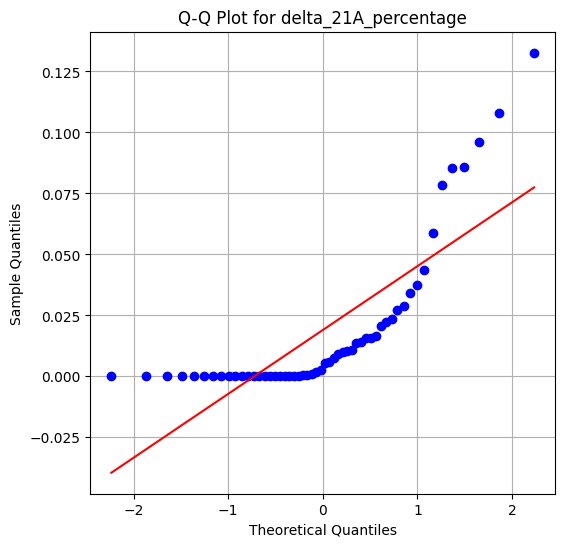

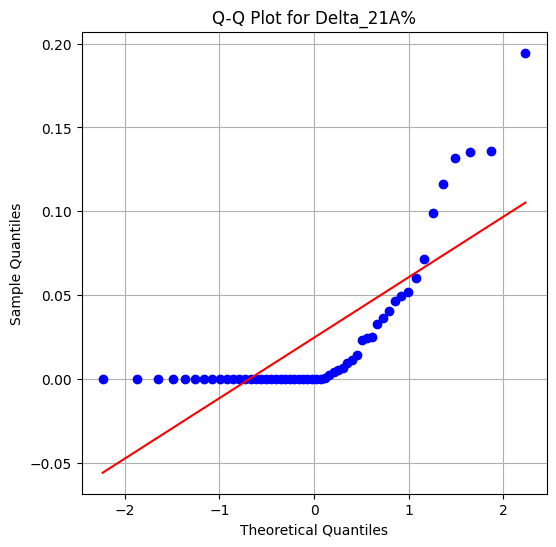

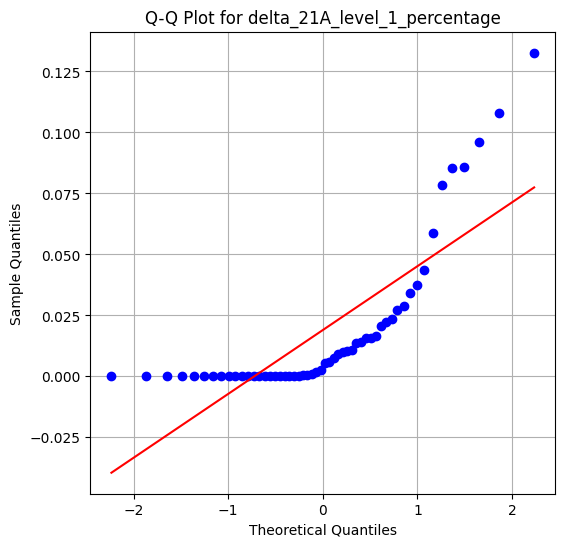

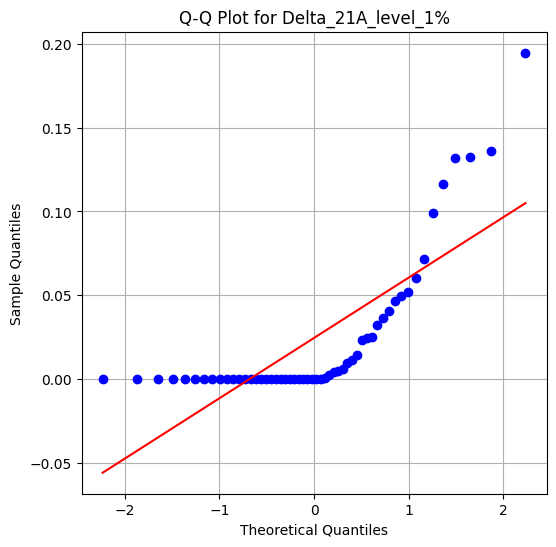

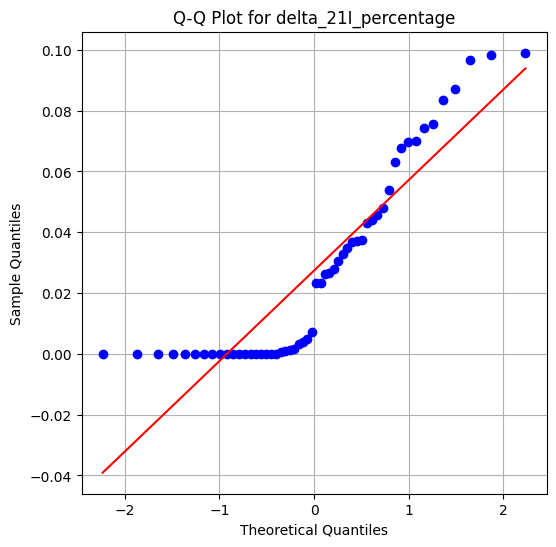

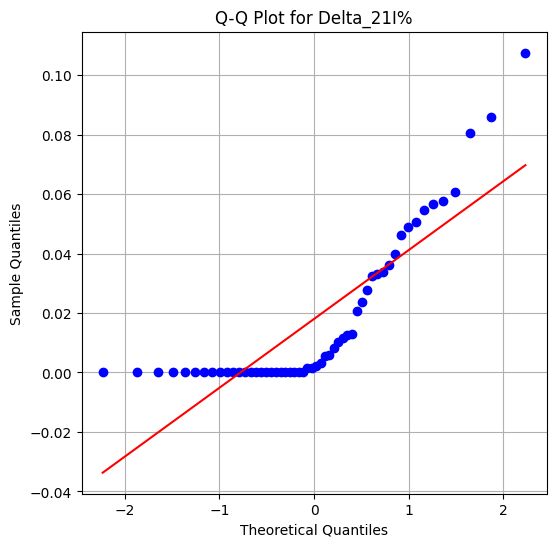

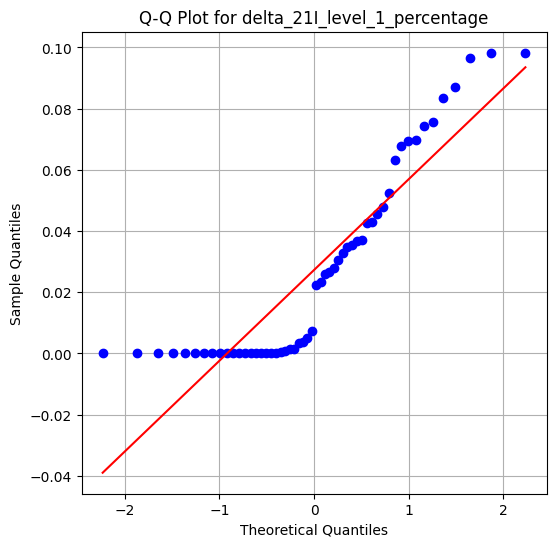

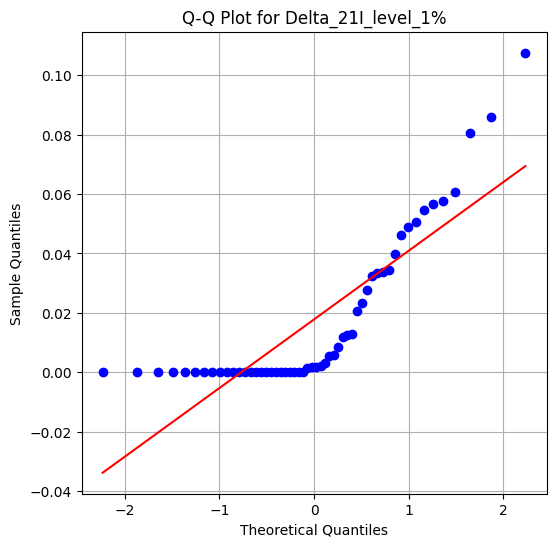

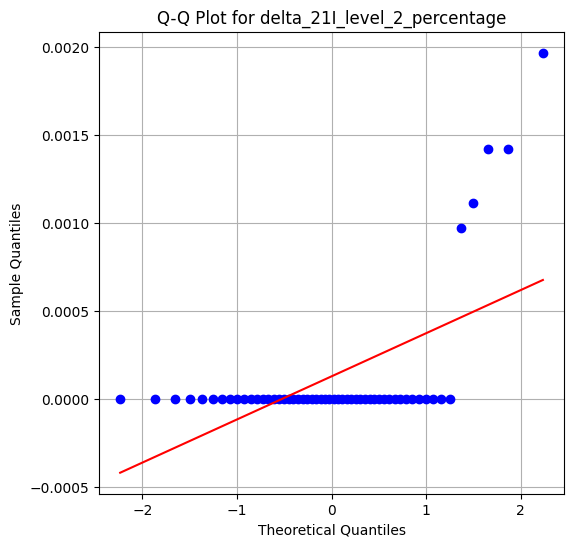

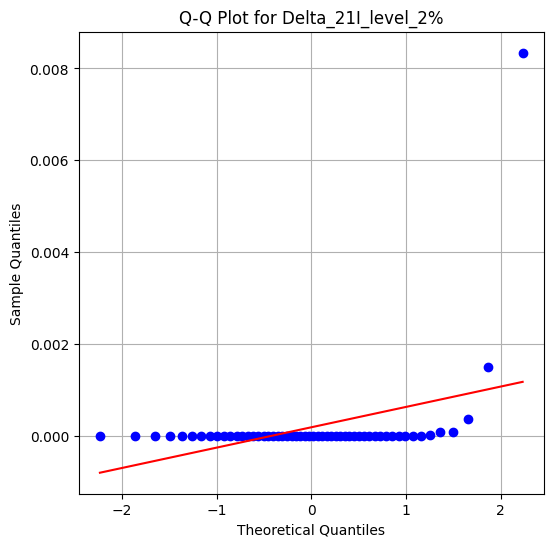

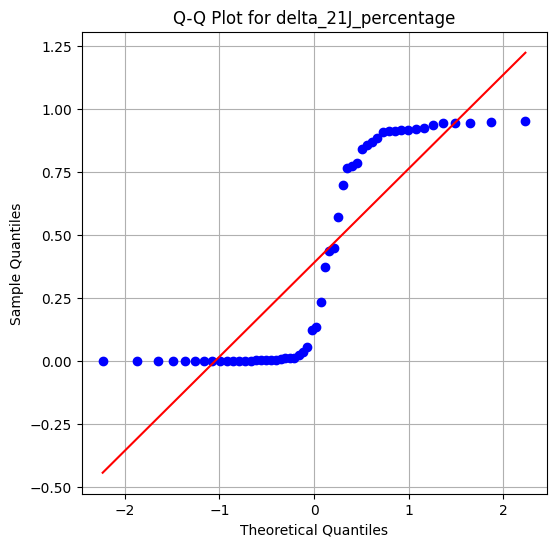

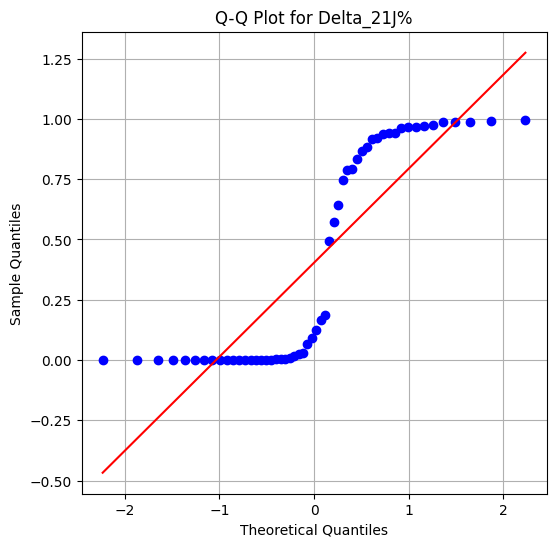

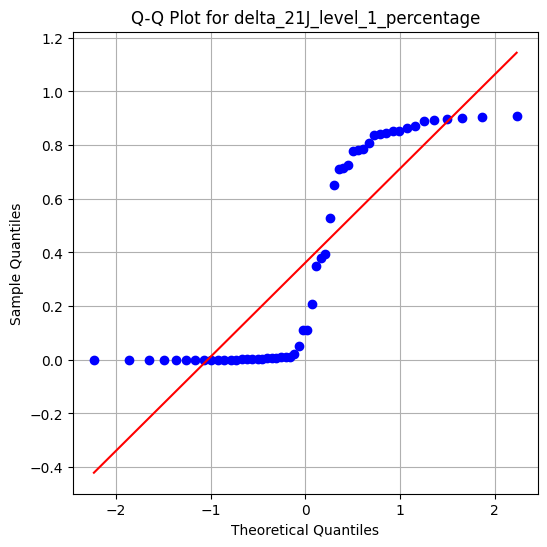

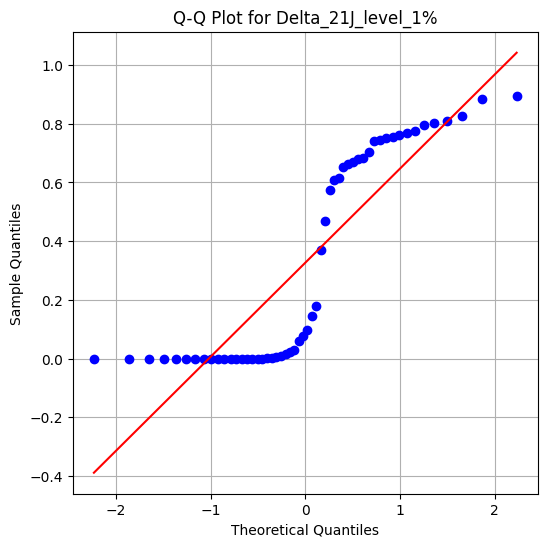

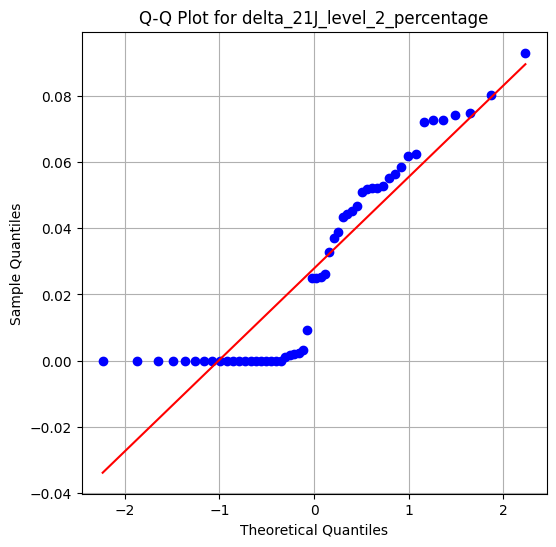

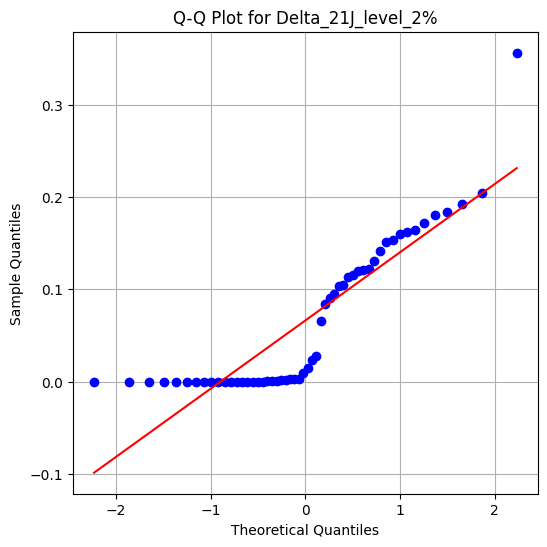

In [ ]:
from scipy.stats import probplot
import matplotlib.pyplot as plt
cli_columns = ['delta_21A_percentage', 'delta_21A_level_1_percentage', 'delta_21I_percentage','delta_21I_level_1_percentage', 'delta_21I_level_2_percentage','delta_21J_percentage', 'delta_21J_level_1_percentage','delta_21J_level_2_percentage']
ww_columns = ['Delta_21A%', 'Delta_21A_level_1%', 'Delta_21I%', 'Delta_21I_level_1%', 'Delta_21I_level_2%', 'Delta_21J%', 'Delta_21J_level_1%', 'Delta_21J_level_2%']

# Define a function to create Q-Q plot
def qq_plot(data, title):
    plt.figure(figsize=(6, 6))
    probplot(data, dist="norm", plot=plt)
    plt.title(title)
    plt.xlabel("Theoretical Quantiles")
    plt.ylabel("Sample Quantiles")
    plt.grid(True)
    plt.show()

# Create Q-Q plots for each column
for cli_col, ww_col in zip(cli_columns, ww_columns):
    qq_plot(combined_study_cleandf[cli_col], title=f"Q-Q Plot for {cli_col}")
    qq_plot(combined_study_cleandf[ww_col], title=f"Q-Q Plot for {ww_col}")


Combined R-squared: 0.9641742484951199
Correlation: 0.9819237488191851
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                 1.157e+04
Date:                Mon, 12 Feb 2024   Prob (F-statistic):          5.56e-313
Time:                        21:47:36   Log-Likelihood:                 703.38
No. Observations:                 432   AIC:                            -1403.
Df Residuals:                     430   BIC:                            -1395.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

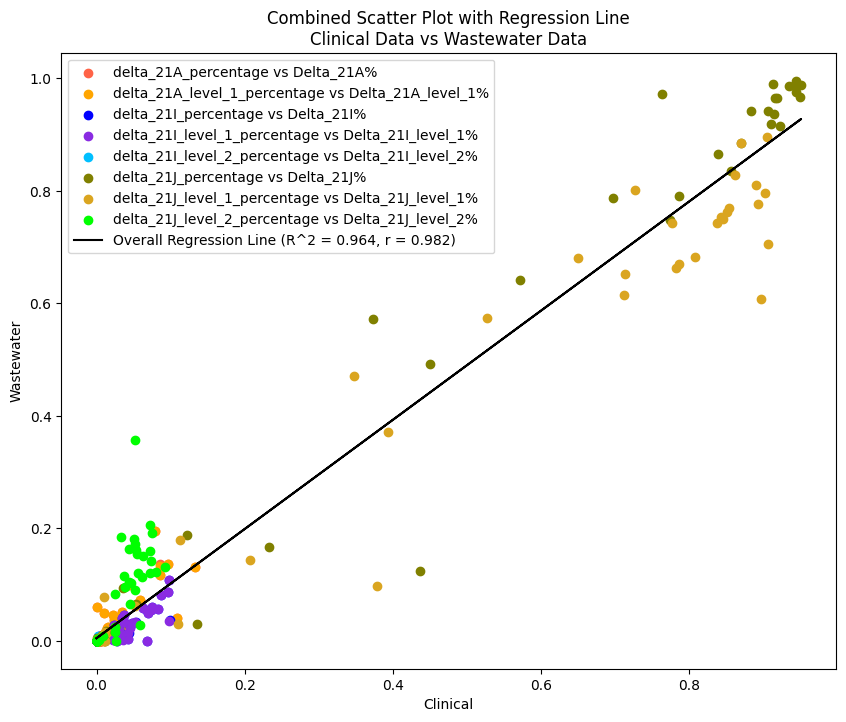

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm


cli_columns = ['delta_21A_percentage', 'delta_21A_level_1_percentage', 'delta_21I_percentage','delta_21I_level_1_percentage', 'delta_21I_level_2_percentage','delta_21J_percentage', 'delta_21J_level_1_percentage','delta_21J_level_2_percentage']
ww_columns = ['Delta_21A%', 'Delta_21A_level_1%', 'Delta_21I%', 'Delta_21I_level_1%', 'Delta_21I_level_2%', 'Delta_21J%', 'Delta_21J_level_1%', 'Delta_21J_level_2%']
#colors = ['orange', 'blue', 'purple', 'green', 'yellow', 'aqua', 'brown', 'pink']
colors = ['tomato', 'orange', 'blue', 'blueviolet','deepskyblue', 'olive', 'goldenrod', 'lime']

plt.figure(figsize=(10,8))
# Aggregate gisaid and ww data

all_cli_data = pd.Series(dtype=float)
all_ww_data = pd.Series(dtype=float)

for cli_col, ww_col, color in zip(cli_columns, ww_columns,colors):
#cli_data = pd.concat([combined_study_cleandf [col] for col in cli_columns])
#ww_data = pd.concat([combined_study_cleandf[col] for col in ww_columns])

    # Remove NaN values
    valid_df = combined_study_cleandf[[cli_col, ww_col]].dropna()
    X= valid_df[cli_col]
    y = valid_df[ww_col]

    plt.scatter(X, y, color=color, label=f'{cli_col} vs {ww_col}')

    all_cli_data = pd.concat([all_cli_data, X])
    all_ww_data = pd.concat([all_ww_data, y])


#correlation = cli_data.corr(ww_data)


X = all_cli_data.values.reshape(-1, 1)
y = all_ww_data.values.reshape(-1, 1)

model = LinearRegression().fit(X, y)
y_pred = model.predict(X)

# R-squared
r_squared = r2_score(y, y_pred)
print(f"Combined R-squared: {r_squared}")
correlation = np.corrcoef(all_cli_data, all_ww_data)[0, 1]
print(f"Correlation: {correlation}")

# Scatter plot
#plt.figure(figsize=(10, 8))
plt.plot(all_cli_data, y_pred, color='black', label=f'Overall Regression Line (R^2 = {r_squared:.3f}, r = {correlation:.3f})')

X_sm = sm.add_constant(X)  # Adding a constant for the intercept
model_sm = sm.OLS(y, X_sm).fit()
print(model_sm.summary())


plt.title('Combined Scatter Plot with Regression Line\nClinical Data vs Wastewater Data')
plt.xlabel("Clinical")
plt.ylabel("Wastewater")
plt.legend()
plt.show()

Correlation between delta_21A_percentage and Delta_21A%: 0.845431263784678
R-squared for delta_21A_percentage vs Delta_21A%: 0.7147540217845585


<ipython-input-40-bbe117f53427>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Variant': cli_col, 'r': corr, 'R^2': r_squared}, ignore_index=True)


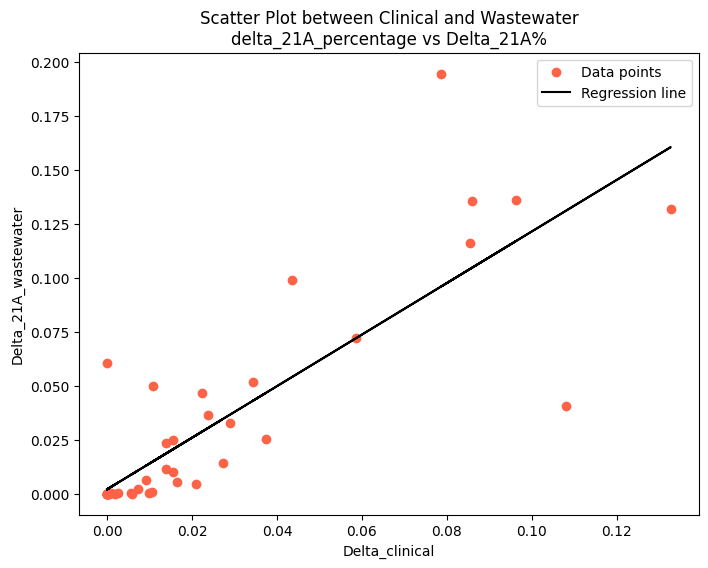

Correlation between delta_21A_level_1_percentage and Delta_21A_level_1%: 0.8453764430875551
R-squared for delta_21A_level_1_percentage vs Delta_21A_level_1%: 0.7146613305273666


<ipython-input-40-bbe117f53427>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Variant': cli_col, 'r': corr, 'R^2': r_squared}, ignore_index=True)


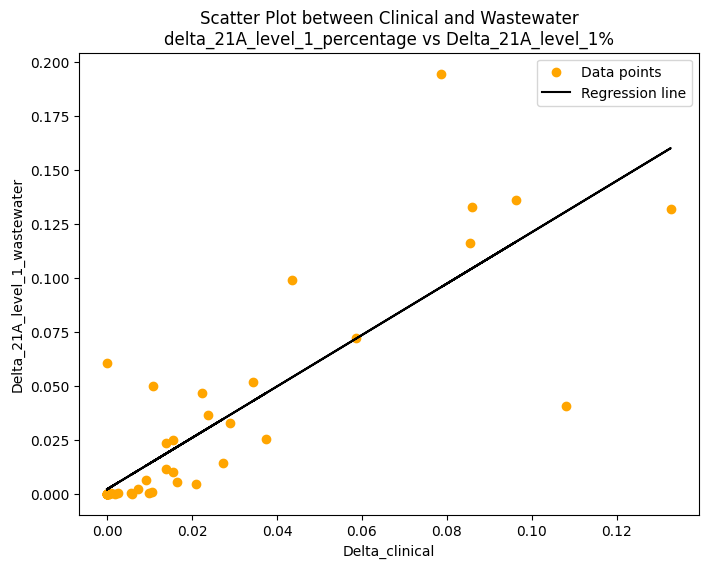

Correlation between delta_21I_percentage and Delta_21I%: 0.8699488074772453
R-squared for delta_21I_percentage vs Delta_21I%: 0.75681092763108


<ipython-input-40-bbe117f53427>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Variant': cli_col, 'r': corr, 'R^2': r_squared}, ignore_index=True)


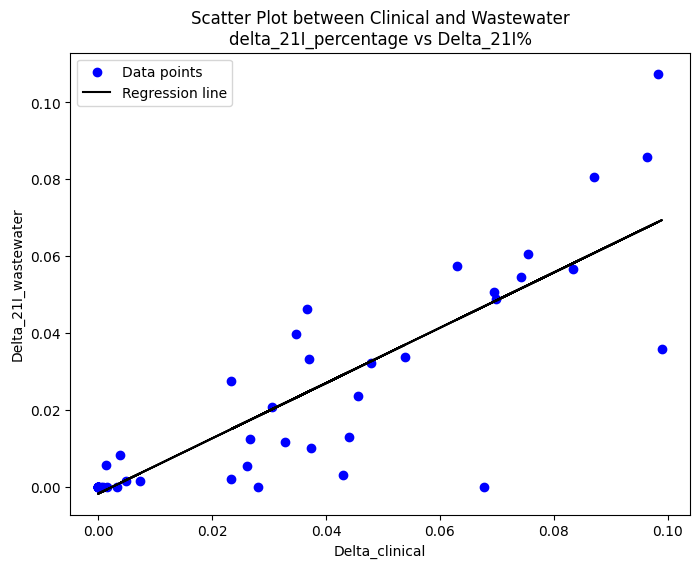

Correlation between delta_21I_level_1_percentage and Delta_21I_level_1%: 0.866515633652899
R-squared for delta_21I_level_1_percentage vs Delta_21I_level_1%: 0.7508493433648853


<ipython-input-40-bbe117f53427>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Variant': cli_col, 'r': corr, 'R^2': r_squared}, ignore_index=True)


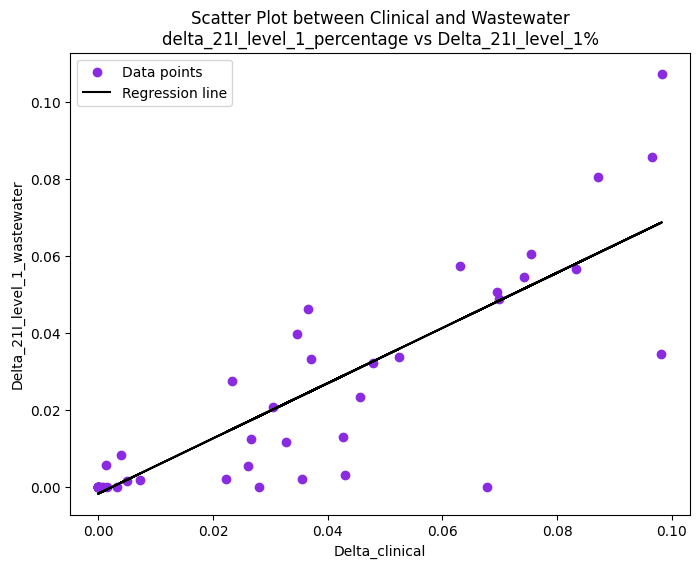

Correlation between delta_21I_level_2_percentage and Delta_21I_level_2%: 0.6518680129840448
R-squared for delta_21I_level_2_percentage vs Delta_21I_level_2%: 0.4249319063517668


<ipython-input-40-bbe117f53427>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Variant': cli_col, 'r': corr, 'R^2': r_squared}, ignore_index=True)


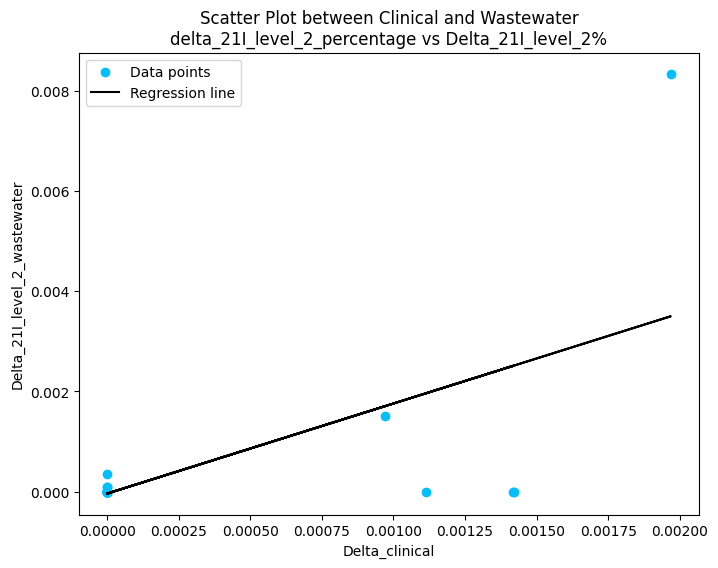

Correlation between delta_21J_percentage and Delta_21J%: 0.989212724703623
R-squared for delta_21J_percentage vs Delta_21J%: 0.9785418147155653


<ipython-input-40-bbe117f53427>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Variant': cli_col, 'r': corr, 'R^2': r_squared}, ignore_index=True)


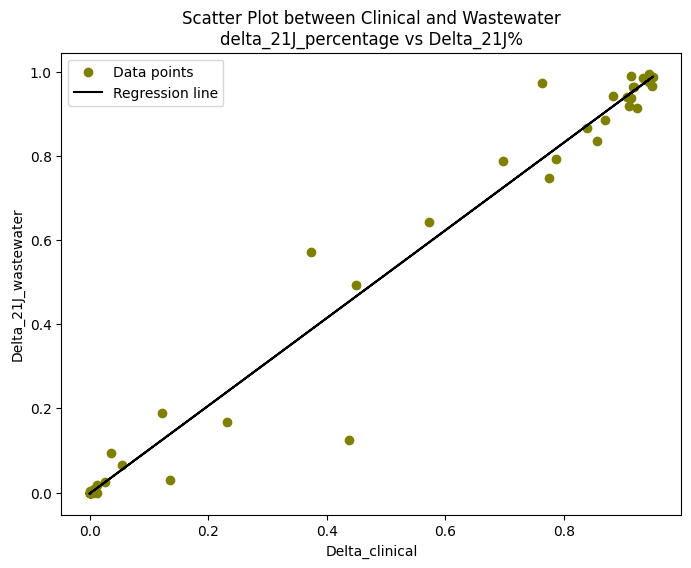

Correlation between delta_21J_level_1_percentage and Delta_21J_level_1%: 0.9831587002941119
R-squared for delta_21J_level_1_percentage vs Delta_21J_level_1%: 0.9666010299640078


<ipython-input-40-bbe117f53427>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Variant': cli_col, 'r': corr, 'R^2': r_squared}, ignore_index=True)


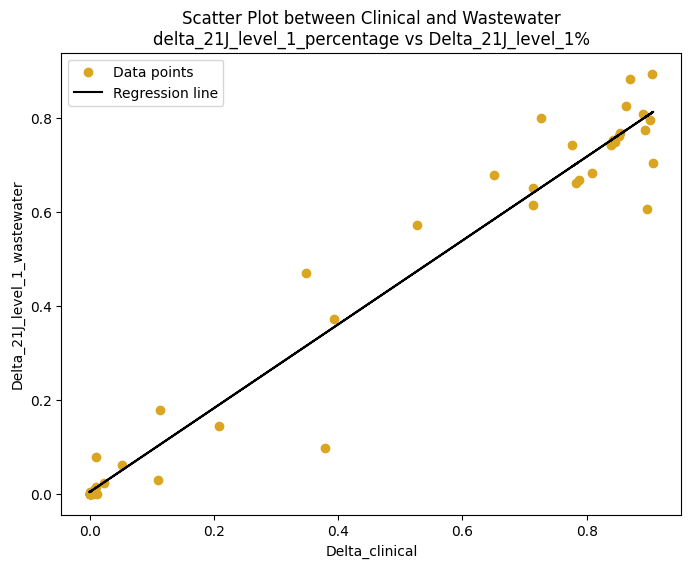

Correlation between delta_21J_level_2_percentage and Delta_21J_level_2%: 0.811646079729303
R-squared for delta_21J_level_2_percentage vs Delta_21J_level_2%: 0.6587693587399451


<ipython-input-40-bbe117f53427>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Variant': cli_col, 'r': corr, 'R^2': r_squared}, ignore_index=True)


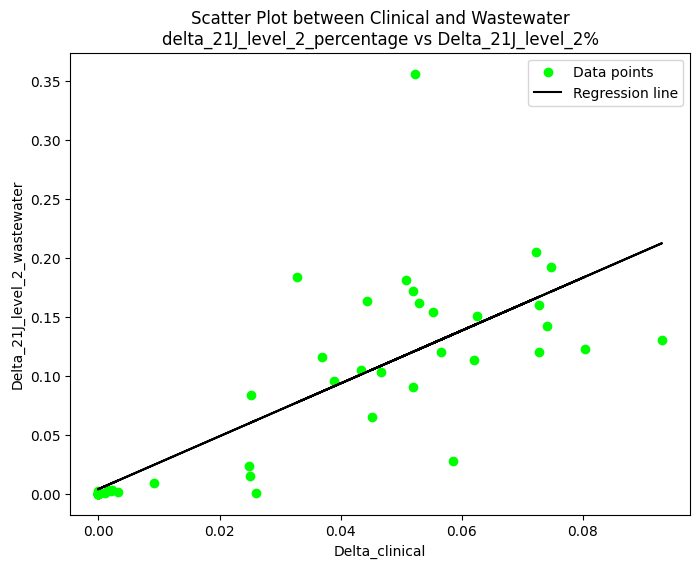

,Variant,r,R^2
0,delta_21A_percentage,0.845431,0.714754
1,delta_21A_level_1_percentage,0.845376,0.714661
2,delta_21I_percentage,0.869949,0.756811
3,delta_21I_level_1_percentage,0.866516,0.750849
4,delta_21I_level_2_percentage,0.651868,0.424932
5,delta_21J_percentage,0.989213,0.978542
6,delta_21J_level_1_percentage,0.983159,0.966601
7,delta_21J_level_2_percentage,0.811646,0.658769


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import pandas as pd

cli_columns = ['delta_21A_percentage', 'delta_21A_level_1_percentage', 'delta_21I_percentage','delta_21I_level_1_percentage', 'delta_21I_level_2_percentage','delta_21J_percentage', 'delta_21J_level_1_percentage','delta_21J_level_2_percentage']
ww_columns = ['Delta_21A%', 'Delta_21A_level_1%', 'Delta_21I%', 'Delta_21I_level_1%', 'Delta_21I_level_2%', 'Delta_21J%', 'Delta_21J_level_1%', 'Delta_21J_level_2%']
colors = ['tomato', 'orange', 'blue', 'blueviolet','deepskyblue', 'olive', 'goldenrod', 'lime']


results = pd.DataFrame(columns=['Variant', 'r', 'R^2'])

# Iterate through each pair of columns along with a unique color
for (cli_col, ww_col), color in zip(zip(cli_columns, ww_columns), colors):
    xlabel = cli_col.split('_')[0].capitalize() + "_clinical"
    ylabel = ww_col.split('%')[0]+ "_wastewater"
    X = combined_study_cleandf[[cli_col]]
    y = combined_study_cleandf[[ww_col]].loc[X.index]

    # Drop rows where either X or y is NaN and recalculate indices
    valid_indices = X.join(y).dropna().index
    X = X.loc[valid_indices]
    y = y.loc[valid_indices]

    # Correlation
    corr = X[cli_col].corr(y[ww_col])
    print(f"Correlation between {cli_col} and {ww_col}: {corr}")

    # Prepare data for Linear Regression
    X = X.values.reshape(-1, 1)
    y = y.values.reshape(-1, 1)

    # Linear Regression
    model = LinearRegression().fit(X, y)
    y_pred = model.predict(X)

    # R-squared
    r_squared = r2_score(y, y_pred)
    print(f"R-squared for {cli_col} vs {ww_col}: {r_squared}")

    results = results.append({'Variant': cli_col, 'r': corr, 'R^2': r_squared}, ignore_index=True)

    # Scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, color=color, label='Data points')
    plt.plot(X, y_pred, color='black', label='Regression line')
    plt.title(f'Scatter Plot between Clinical and Wastewater\n{cli_col} vs {ww_col}')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

results


Spearman's Correlation between delta_21A_percentage and Delta_21A%: 0.8971581487571312
R-squared for delta_21A_percentage vs Delta_21A%: 0.7147540217845585


<ipython-input-46-f61ffa893a1c>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Variant': cli_col, 'r': corr, 'R^2': r_squared}, ignore_index=True)


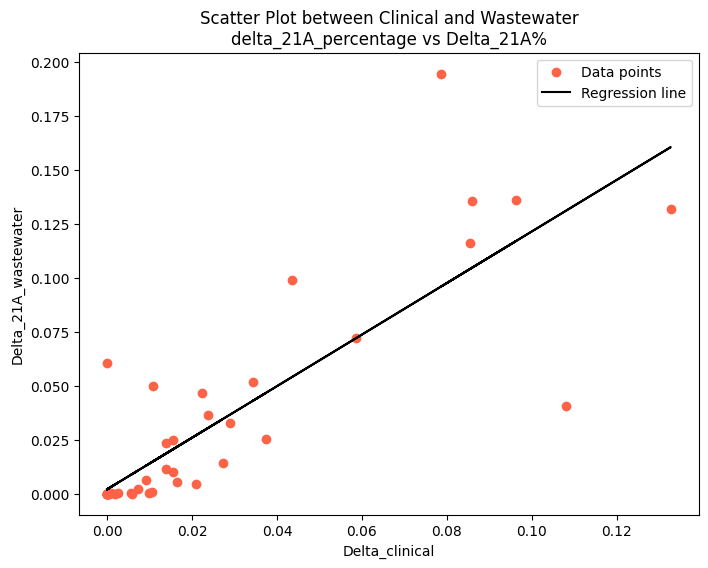

Spearman's Correlation between delta_21A_level_1_percentage and Delta_21A_level_1%: 0.8971581487571312
R-squared for delta_21A_level_1_percentage vs Delta_21A_level_1%: 0.7146613305273666


<ipython-input-46-f61ffa893a1c>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Variant': cli_col, 'r': corr, 'R^2': r_squared}, ignore_index=True)


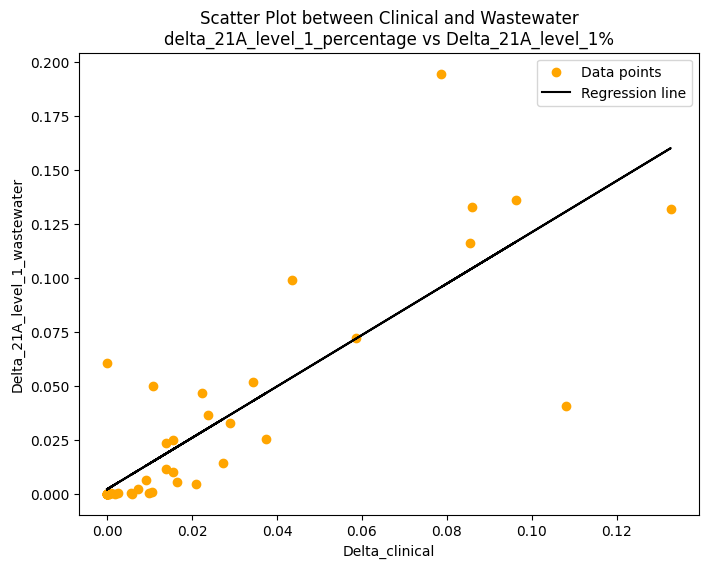

Spearman's Correlation between delta_21I_percentage and Delta_21I%: 0.8906522533821695
R-squared for delta_21I_percentage vs Delta_21I%: 0.75681092763108


<ipython-input-46-f61ffa893a1c>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Variant': cli_col, 'r': corr, 'R^2': r_squared}, ignore_index=True)


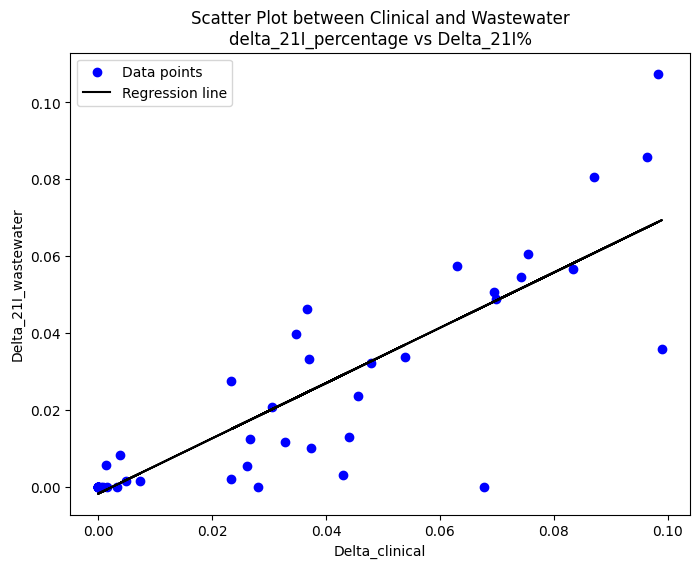

Spearman's Correlation between delta_21I_level_1_percentage and Delta_21I_level_1%: 0.8906522533821695
R-squared for delta_21I_level_1_percentage vs Delta_21I_level_1%: 0.7508493433648853


<ipython-input-46-f61ffa893a1c>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Variant': cli_col, 'r': corr, 'R^2': r_squared}, ignore_index=True)


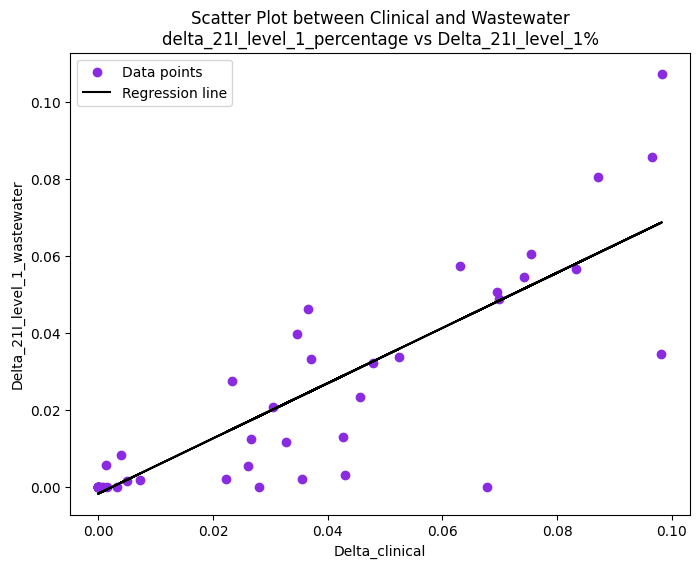

Spearman's Correlation between delta_21I_level_2_percentage and Delta_21I_level_2%: 0.3230992336212764
R-squared for delta_21I_level_2_percentage vs Delta_21I_level_2%: 0.4249319063517668


<ipython-input-46-f61ffa893a1c>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Variant': cli_col, 'r': corr, 'R^2': r_squared}, ignore_index=True)


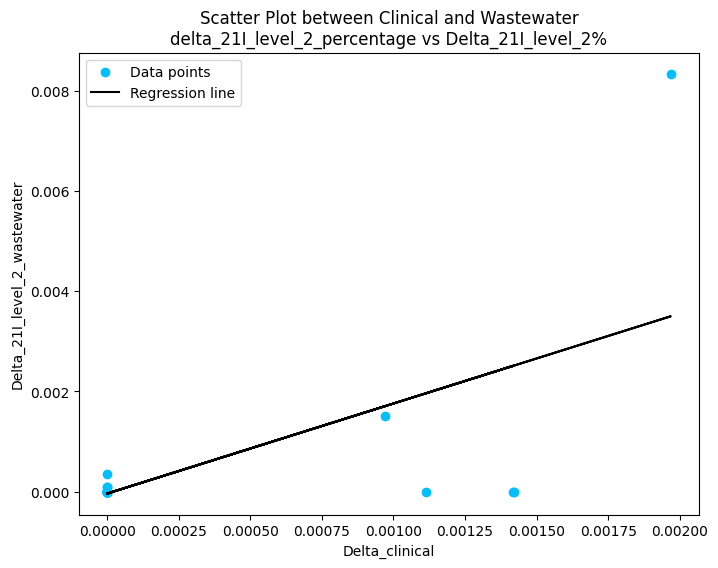

Spearman's Correlation between delta_21J_percentage and Delta_21J%: 0.9628660121122493
R-squared for delta_21J_percentage vs Delta_21J%: 0.9785418147155653


<ipython-input-46-f61ffa893a1c>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Variant': cli_col, 'r': corr, 'R^2': r_squared}, ignore_index=True)


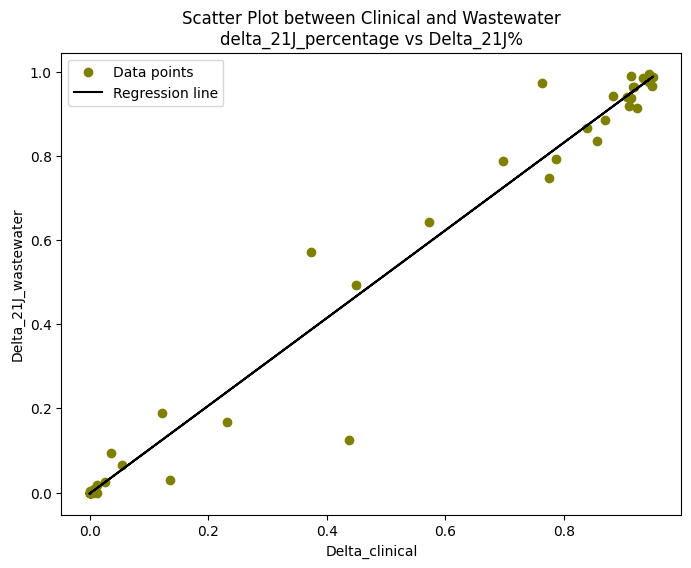

Spearman's Correlation between delta_21J_level_1_percentage and Delta_21J_level_1%: 0.9432444144299612
R-squared for delta_21J_level_1_percentage vs Delta_21J_level_1%: 0.9666010299640078


<ipython-input-46-f61ffa893a1c>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Variant': cli_col, 'r': corr, 'R^2': r_squared}, ignore_index=True)


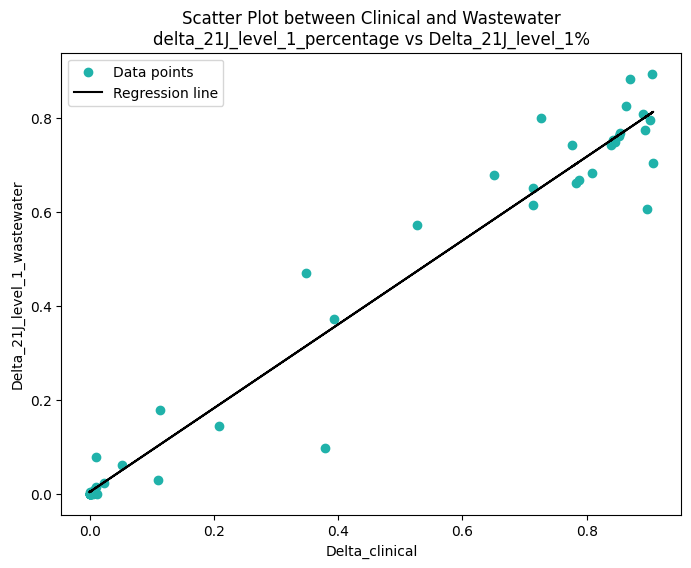

Spearman's Correlation between delta_21J_level_2_percentage and Delta_21J_level_2%: 0.9020023800411767
R-squared for delta_21J_level_2_percentage vs Delta_21J_level_2%: 0.6587693587399451


<ipython-input-46-f61ffa893a1c>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Variant': cli_col, 'r': corr, 'R^2': r_squared}, ignore_index=True)


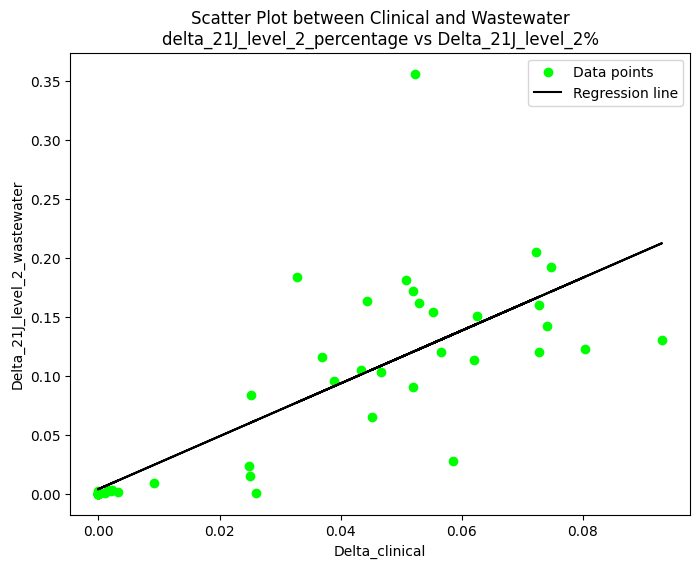

,Variant,r,R^2
0,delta_21A_percentage,0.897158,0.714754
1,delta_21A_level_1_percentage,0.897158,0.714661
2,delta_21I_percentage,0.890652,0.756811
3,delta_21I_level_1_percentage,0.890652,0.750849
4,delta_21I_level_2_percentage,0.323099,0.424932
5,delta_21J_percentage,0.962866,0.978542
6,delta_21J_level_1_percentage,0.943244,0.966601
7,delta_21J_level_2_percentage,0.902002,0.658769


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import pandas as pd

cli_columns = ['delta_21A_percentage', 'delta_21A_level_1_percentage', 'delta_21I_percentage','delta_21I_level_1_percentage', 'delta_21I_level_2_percentage','delta_21J_percentage', 'delta_21J_level_1_percentage','delta_21J_level_2_percentage']
ww_columns = ['Delta_21A%', 'Delta_21A_level_1%', 'Delta_21I%', 'Delta_21I_level_1%', 'Delta_21I_level_2%', 'Delta_21J%', 'Delta_21J_level_1%', 'Delta_21J_level_2%']
colors = ['tomato', 'orange', 'blue', 'blueviolet','deepskyblue', 'olive', 'lightseagreen', 'lime']


results = pd.DataFrame(columns=['Variant', 'r', 'R^2'])

# Iterate through each pair of columns along with a unique color
for (cli_col, ww_col), color in zip(zip(cli_columns, ww_columns), colors):
    xlabel = cli_col.split('_')[0].capitalize() + "_clinical"
    ylabel = ww_col.split('%')[0]+ "_wastewater"
    X = combined_study_cleandf[[cli_col]]
    y = combined_study_cleandf[[ww_col]].loc[X.index]

    # Drop rows where either X or y is NaN and recalculate indices
    valid_indices = X.join(y).dropna().index
    X = X.loc[valid_indices]
    y = y.loc[valid_indices]

    # Correlation
    corr = X[cli_col].corr(y[ww_col], method='spearman')
    print(f"Spearman's Correlation between {cli_col} and {ww_col}: {corr}")

    # Prepare data for Linear Regression
    X = X.values.reshape(-1, 1)
    y = y.values.reshape(-1, 1)

    # Linear Regression
    model = LinearRegression().fit(X, y)
    y_pred = model.predict(X)

    # R-squared
    r_squared = r2_score(y, y_pred)
    print(f"R-squared for {cli_col} vs {ww_col}: {r_squared}")

    results = results.append({'Variant': cli_col, 'r': corr, 'R^2': r_squared}, ignore_index=True)

    # Scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, color=color, label='Data points')
    plt.plot(X, y_pred, color='black', label='Regression line')
    plt.title(f'Scatter Plot between Clinical and Wastewater\n{cli_col} vs {ww_col}')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

results


Spearman's correlation between delta_21A_percentage and Delta_21A%: 0.8971581487571312, P-Value: 4.306867618358039e-20


<ipython-input-42-162a326ef786>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Variant': cli_col, 'Spearman Correlation': corr, 'P-Value': p_value}, ignore_index=True)


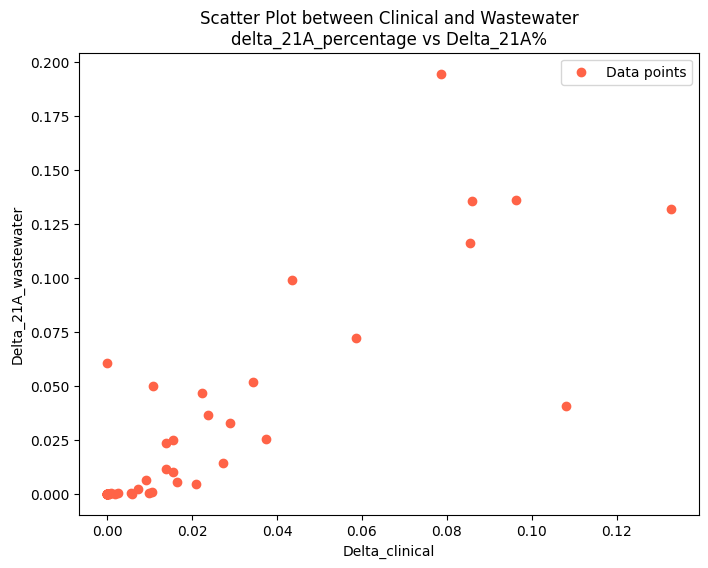

Spearman's correlation between delta_21A_level_1_percentage and Delta_21A_level_1%: 0.8971581487571312, P-Value: 4.306867618358039e-20


<ipython-input-42-162a326ef786>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Variant': cli_col, 'Spearman Correlation': corr, 'P-Value': p_value}, ignore_index=True)


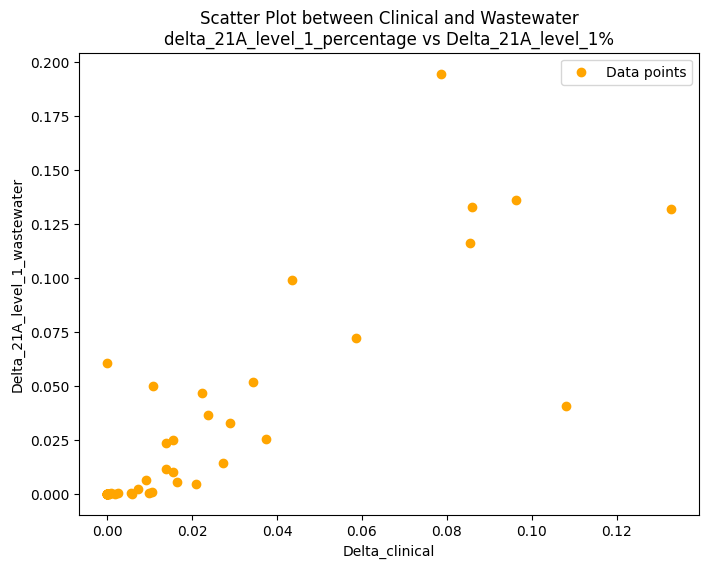

Spearman's correlation between delta_21I_percentage and Delta_21I%: 0.8906522533821695, P-Value: 1.9544695801658993e-19


<ipython-input-42-162a326ef786>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Variant': cli_col, 'Spearman Correlation': corr, 'P-Value': p_value}, ignore_index=True)


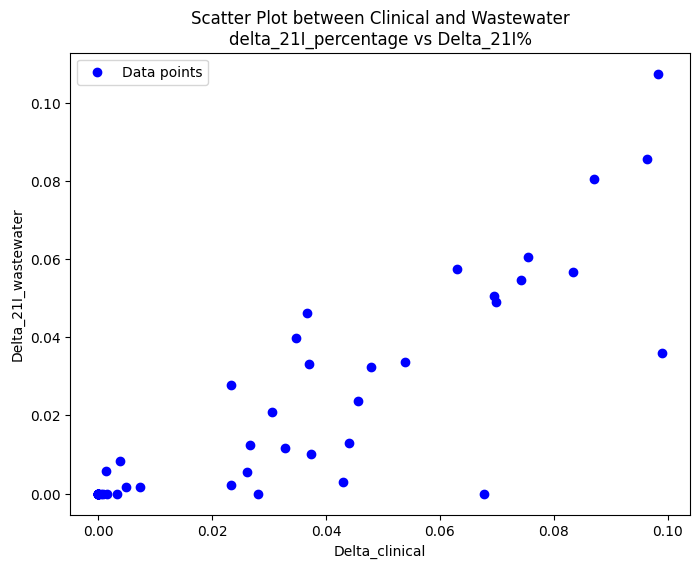

Spearman's correlation between delta_21I_level_1_percentage and Delta_21I_level_1%: 0.8906522533821695, P-Value: 1.9544695801658993e-19


<ipython-input-42-162a326ef786>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Variant': cli_col, 'Spearman Correlation': corr, 'P-Value': p_value}, ignore_index=True)


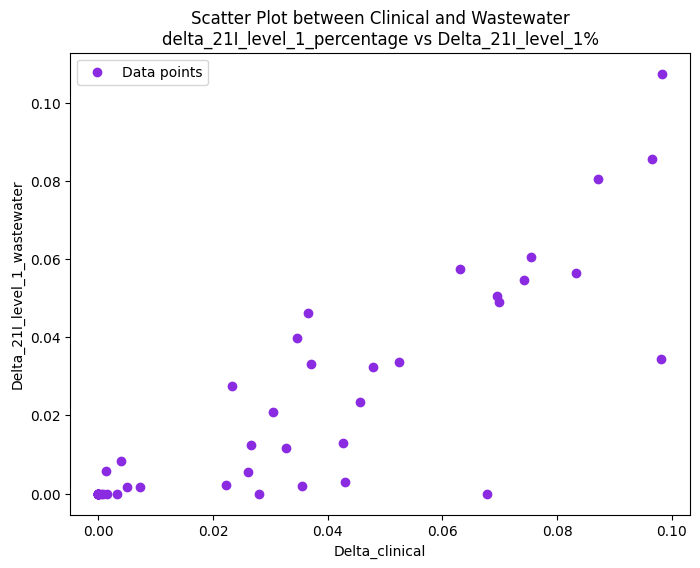

Spearman's correlation between delta_21I_level_2_percentage and Delta_21I_level_2%: 0.3230992336212764, P-Value: 0.017170719134182243


<ipython-input-42-162a326ef786>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Variant': cli_col, 'Spearman Correlation': corr, 'P-Value': p_value}, ignore_index=True)


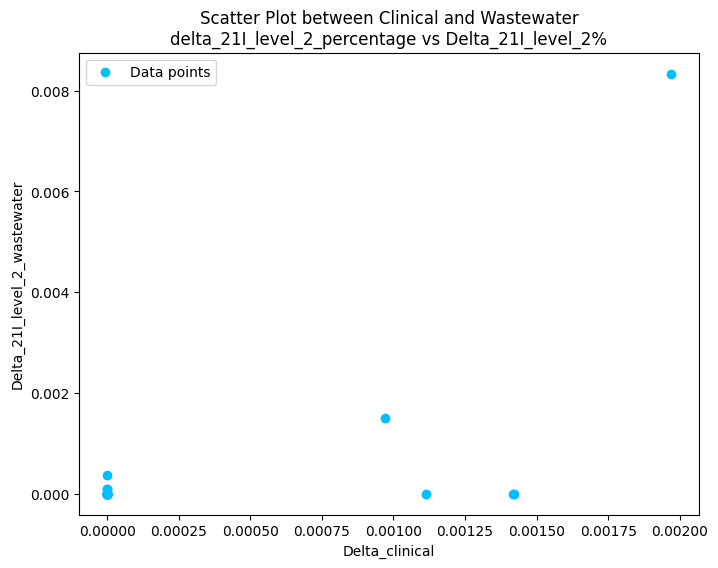

Spearman's correlation between delta_21J_percentage and Delta_21J%: 0.9628660121122493, P-Value: 3.0681247040400794e-31


<ipython-input-42-162a326ef786>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Variant': cli_col, 'Spearman Correlation': corr, 'P-Value': p_value}, ignore_index=True)


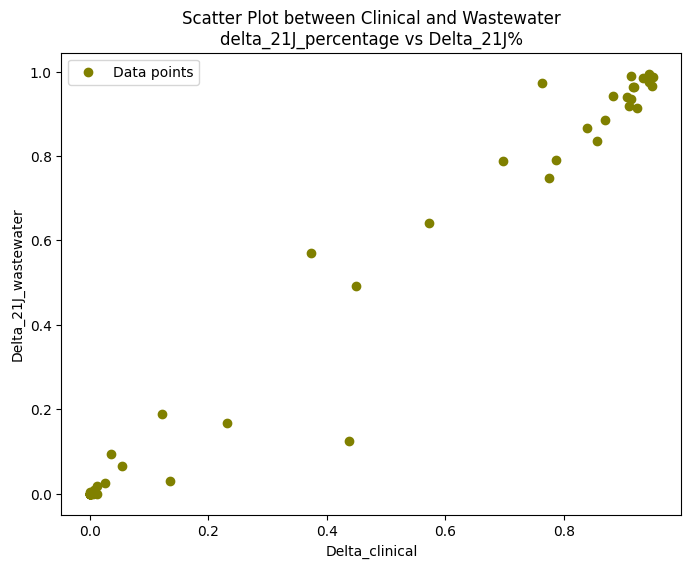

Spearman's correlation between delta_21J_level_1_percentage and Delta_21J_level_1%: 0.9432444144299612, P-Value: 1.4865233656853927e-26


<ipython-input-42-162a326ef786>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Variant': cli_col, 'Spearman Correlation': corr, 'P-Value': p_value}, ignore_index=True)


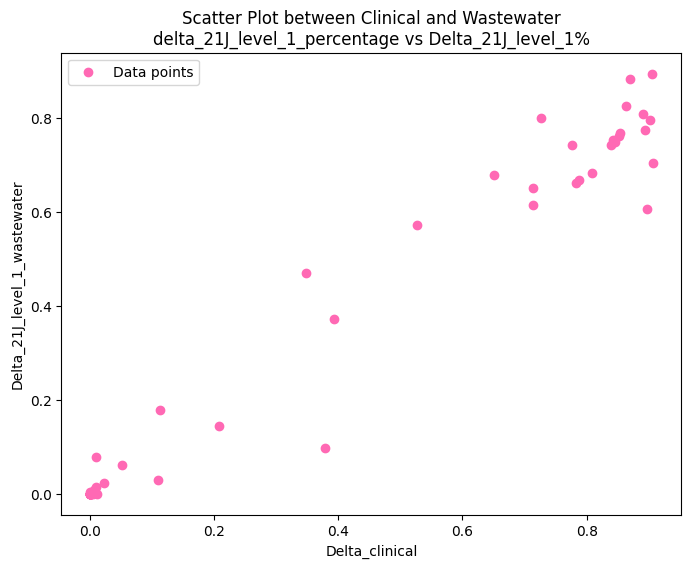

Spearman's correlation between delta_21J_level_2_percentage and Delta_21J_level_2%: 0.9020023800411767, P-Value: 1.3059000786119342e-20


<ipython-input-42-162a326ef786>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Variant': cli_col, 'Spearman Correlation': corr, 'P-Value': p_value}, ignore_index=True)


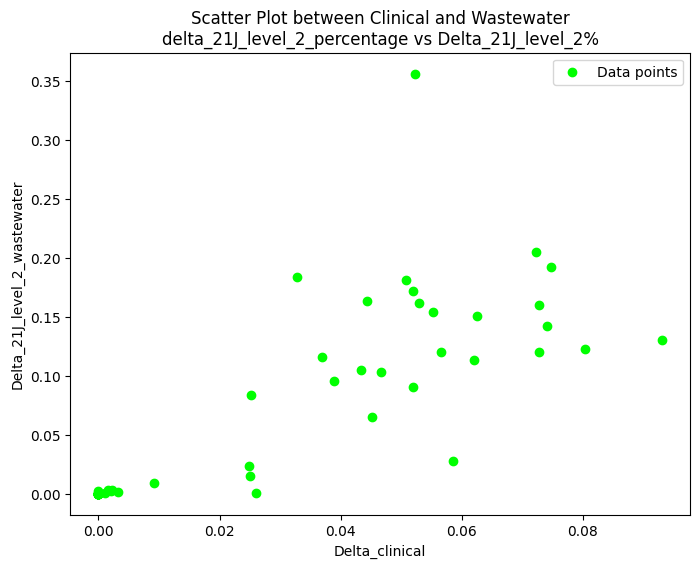

,Variant,Spearman Correlation,P-Value
0,delta_21A_percentage,0.897158,4.306868e-20
1,delta_21A_level_1_percentage,0.897158,4.306868e-20
2,delta_21I_percentage,0.890652,1.954470e-19
3,delta_21I_level_1_percentage,0.890652,1.954470e-19
4,delta_21I_level_2_percentage,0.323099,1.717072e-02
5,delta_21J_percentage,0.962866,3.068125e-31
6,delta_21J_level_1_percentage,0.943244,1.486523e-26
7,delta_21J_level_2_percentage,0.902002,1.305900e-20


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import spearmanr

cli_columns = ['delta_21A_percentage', 'delta_21A_level_1_percentage', 'delta_21I_percentage','delta_21I_level_1_percentage', 'delta_21I_level_2_percentage','delta_21J_percentage', 'delta_21J_level_1_percentage','delta_21J_level_2_percentage']
ww_columns = ['Delta_21A%', 'Delta_21A_level_1%', 'Delta_21I%', 'Delta_21I_level_1%', 'Delta_21I_level_2%', 'Delta_21J%', 'Delta_21J_level_1%', 'Delta_21J_level_2%']
colors = ['tomato', 'orange', 'blue', 'blueviolet','deepskyblue', 'olive', 'hotpink', 'lime']


results = pd.DataFrame(columns=['Variant', 'Spearman Correlation', 'P-Value'])

# Iterate through each pair of columns along with a unique color
for (cli_col, ww_col), color in zip(zip(cli_columns, ww_columns), colors):
    xlabel = cli_col.split('_')[0].capitalize() + "_clinical"
    ylabel = ww_col.split('%')[0]+ "_wastewater"
    X = combined_study_cleandf[[cli_col]]
    y = combined_study_cleandf[[ww_col]].loc[X.index]

    # Drop rows where either X or y is NaN and recalculate indices
    valid_indices = X.join(y).dropna().index
    X = X.loc[valid_indices]
    y = y.loc[valid_indices]

    # Correlation
    corr, p_value = spearmanr(X[cli_col], y[ww_col])
    print(f"Spearman's correlation between {cli_col} and {ww_col}: {corr}, P-Value: {p_value}")

    # Prepare data for Linear Regression
    #X = X.values.reshape(-1, 1)
    #y = y.values.reshape(-1, 1)

    # Linear Regression
    #model = LinearRegression().fit(X, y)
    #y_pred = model.predict(X)

    # R-squared
    #r_squared = r2_score(y, y_pred)
    #print(f"R-squared for {cli_col} vs {ww_col}: {r_squared}")

    results = results.append({'Variant': cli_col, 'Spearman Correlation': corr, 'P-Value': p_value}, ignore_index=True)

    # Scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, color=color, label='Data points')
    #plt.plot(X, y_pred, color='black', label='Regression line')
    plt.title(f'Scatter Plot between Clinical and Wastewater\n{cli_col} vs {ww_col}')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

results


Spearman's correlation between delta_21A_percentage and Delta_21A% with positive values: 0.866447728516694, P-Value: 2.5362519255409525e-09, Num Positive Observations: 28


<ipython-input-43-ae200175e46c>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({


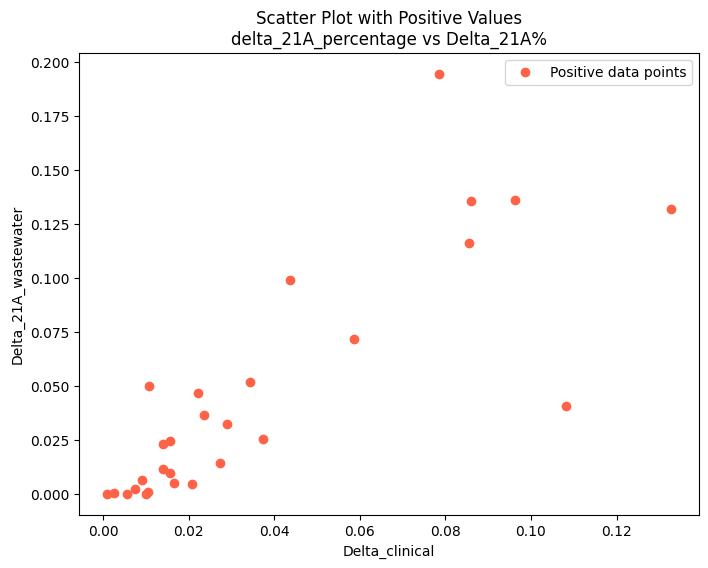

Spearman's correlation between delta_21A_level_1_percentage and Delta_21A_level_1% with positive values: 0.866447728516694, P-Value: 2.5362519255409525e-09, Num Positive Observations: 28


<ipython-input-43-ae200175e46c>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({


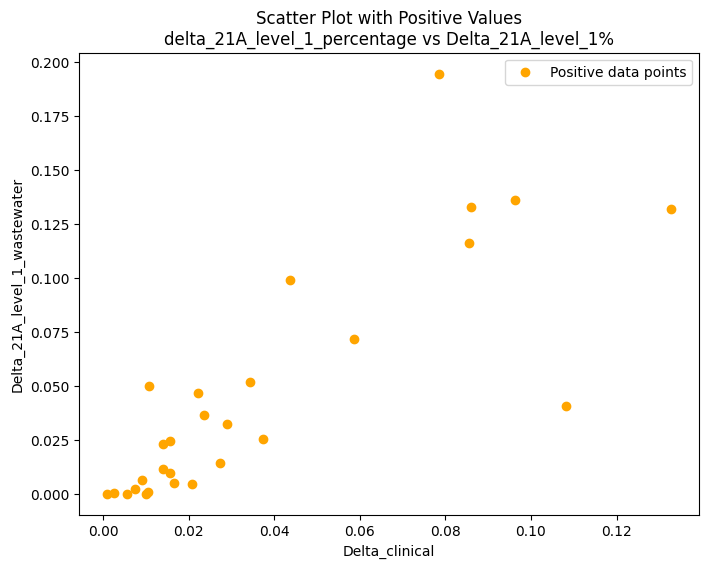

Spearman's correlation between delta_21I_percentage and Delta_21I% with positive values: 0.834975369458128, P-Value: 1.779048109893991e-08, Num Positive Observations: 29


<ipython-input-43-ae200175e46c>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({


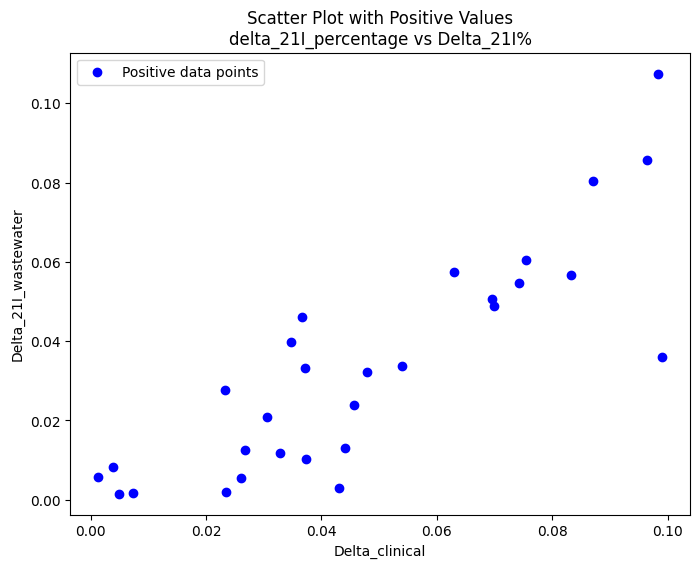

Spearman's correlation between delta_21I_level_1_percentage and Delta_21I_level_1% with positive values: 0.8379310344827584, P-Value: 1.4199424723903179e-08, Num Positive Observations: 29


<ipython-input-43-ae200175e46c>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({


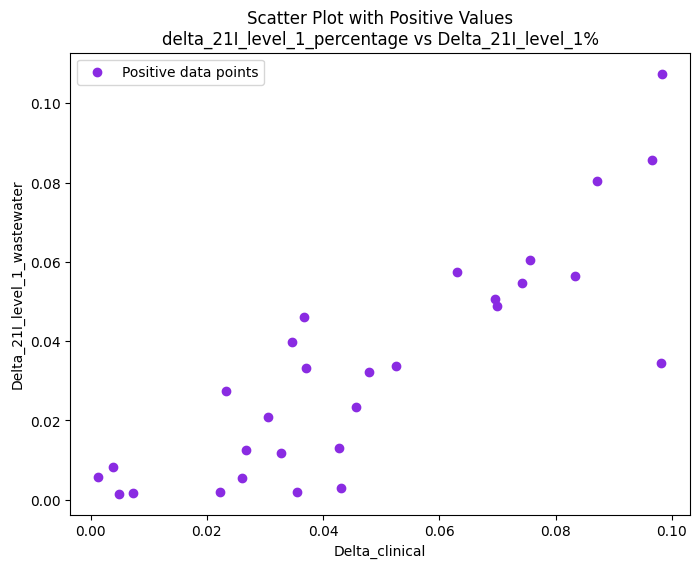

Spearman's correlation between delta_21I_level_2_percentage and Delta_21I_level_2% with positive values: 0.9999999999999999, P-Value: nan, Num Positive Observations: 2


<ipython-input-43-ae200175e46c>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({


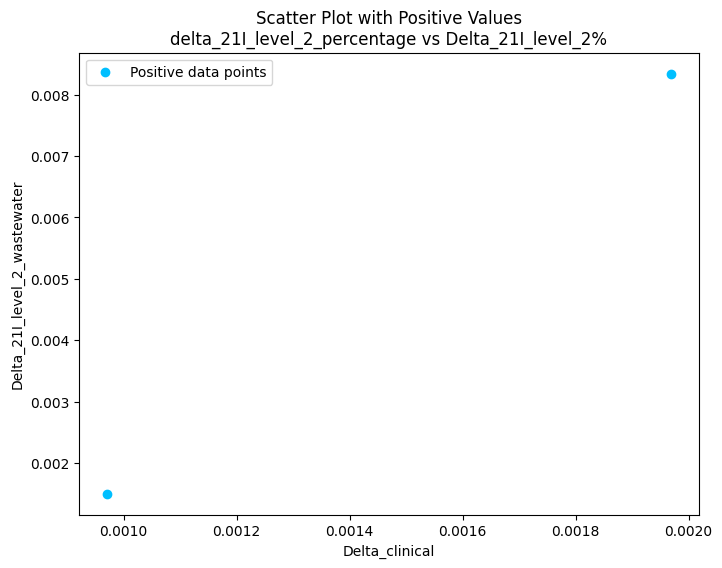

Spearman's correlation between delta_21J_percentage and Delta_21J% with positive values: 0.9494474231316337, P-Value: 1.0662231307221193e-19, Num Positive Observations: 38


<ipython-input-43-ae200175e46c>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({


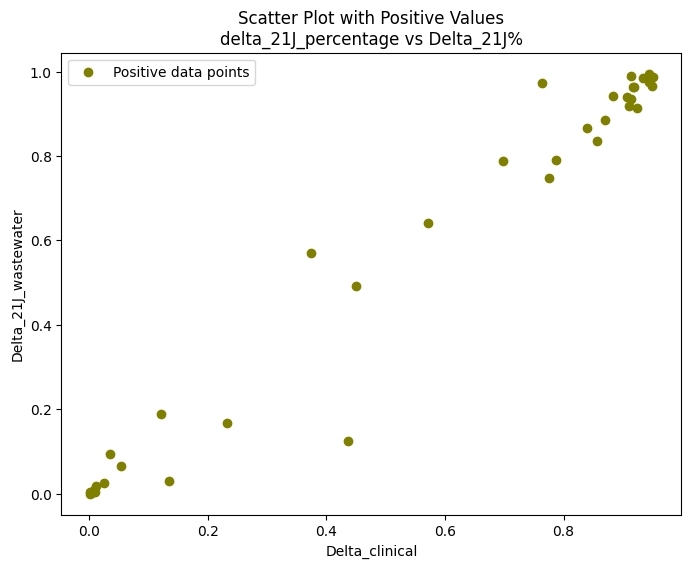

Spearman's correlation between delta_21J_level_1_percentage and Delta_21J_level_1% with positive values: 0.903745851114272, P-Value: 1.8670614896381243e-14, Num Positive Observations: 37


<ipython-input-43-ae200175e46c>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({


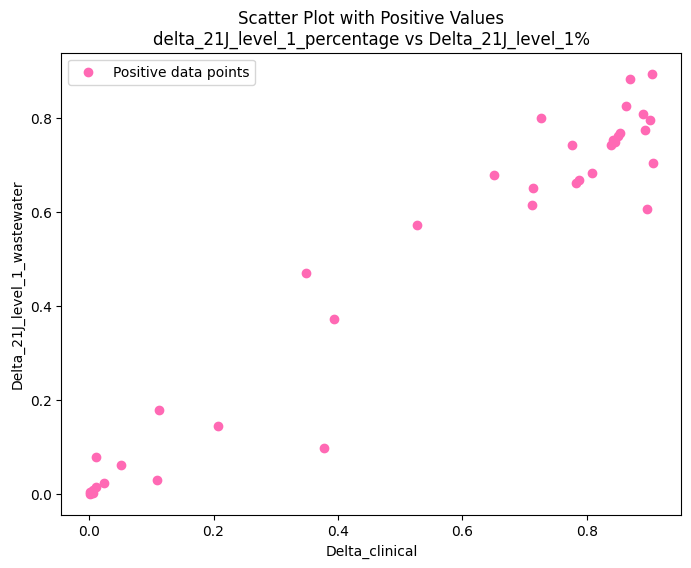

Spearman's correlation between delta_21J_level_2_percentage and Delta_21J_level_2% with positive values: 0.681894576012223, P-Value: 8.963816230726599e-06, Num Positive Observations: 34


<ipython-input-43-ae200175e46c>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({


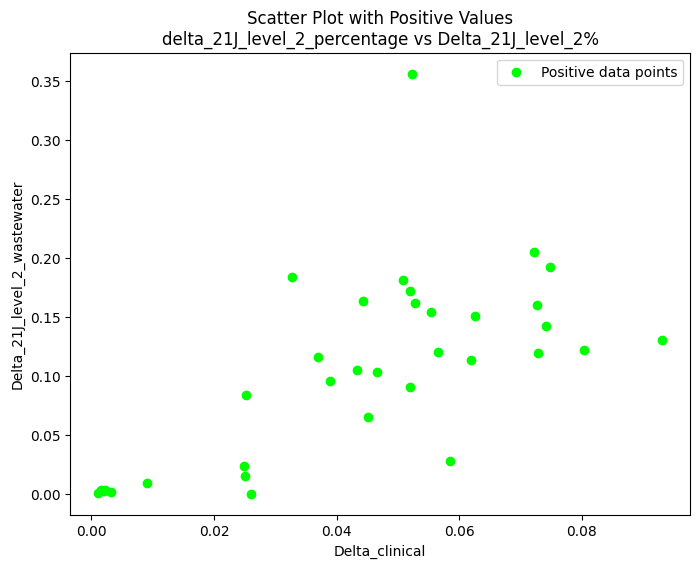

,Variant,Spearman Correlation,P-Value,Num Positive Pairwise Observations
0,delta_21A_percentage,0.866448,2.536252e-09,28
1,delta_21A_level_1_percentage,0.866448,2.536252e-09,28
2,delta_21I_percentage,0.834975,1.779048e-08,29
3,delta_21I_level_1_percentage,0.837931,1.419942e-08,29
4,delta_21I_level_2_percentage,1.000000,NaN,2
5,delta_21J_percentage,0.949447,1.066223e-19,38
6,delta_21J_level_1_percentage,0.903746,1.867061e-14,37
7,delta_21J_level_2_percentage,0.681895,8.963816e-06,34


In [ ]:
import pandas as pd
from scipy.stats import spearmanr
import matplotlib.pyplot as plt

# Assuming 'combined_study_cleandf' is your DataFrame containing the data

results = pd.DataFrame(columns=['Variant', 'Spearman Correlation', 'P-Value', 'Num Positive Pairwise Observations'])

# Iterate through each pair of columns along with a unique color
for (cli_col, ww_col), color in zip(zip(cli_columns, ww_columns), colors):
    xlabel = cli_col.split('_')[0].capitalize() + "_clinical"
    ylabel = ww_col.split('%')[0] + "_wastewater"
    X = combined_study_cleandf[[cli_col]]
    y = combined_study_cleandf[[ww_col]].loc[X.index]

    # Filter out rows where either X or y is NaN or <= 0
    filtered_data = X.join(y, how='inner').dropna()
    filtered_data = filtered_data[(filtered_data[cli_col] > 0) & (filtered_data[ww_col] > 0)]

    X_valid = filtered_data[cli_col]
    y_valid = filtered_data[ww_col]

    # Number of positive pairwise observations after filtering
    num_positive_observations = len(filtered_data)

    # Spearman's Correlation
    corr, p_value = spearmanr(X_valid, y_valid)
    print(f"Spearman's correlation between {cli_col} and {ww_col} with positive values: {corr}, P-Value: {p_value}, Num Positive Observations: {num_positive_observations}")

    # Append results to DataFrame
    results = results.append({
        'Variant': cli_col,
        'Spearman Correlation': corr,
        'P-Value': p_value,
        'Num Positive Pairwise Observations': num_positive_observations
    }, ignore_index=True)

    # Scatter plot with positive values only
    plt.figure(figsize=(8, 6))
    plt.scatter(X_valid, y_valid, color=color, label='Positive data points')
    plt.title(f'Scatter Plot with Positive Values\n{cli_col} vs {ww_col}')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

# Display the results DataFrame
results


In [ ]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_reset
results = pd.DataFrame(columns=['Variant', 'RESET Test Statistic', 'P-Value', 'Linear or Non-linear'])

for cli_col, ww_col in zip(cli_columns, ww_columns):
    X = combined_study_cleandf[[cli_col]].dropna()
    y = combined_study_cleandf[[ww_col]].loc[X.index].dropna()

    # Ensure matched indices after dropna
    X = X.loc[y.index]

    # Adding constant for intercept in OLS model
    X_const = sm.add_constant(X)

    # Fitting the linear model
    model = sm.OLS(y, X_const).fit()

    # Ramsey RESET Test for linearity
    test = linear_reset(model, power=3, use_f=True)  # power=3 checks for squared and cubic terms

    # Interpreting the results
    linear_non_linear = 'Linear' if test.pvalue > 0.05 else 'Non-linear'
    results = results.append({'Variant': cli_col, 'RESET Test Statistic': test.statistic, 'P-Value': test.pvalue, 'Linear or Non-linear': linear_non_linear}, ignore_index=True)

# Display the results
results


<ipython-input-44-4cd7a2f15c7e>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Variant': cli_col, 'RESET Test Statistic': test.statistic, 'P-Value': test.pvalue, 'Linear or Non-linear': linear_non_linear}, ignore_index=True)
<ipython-input-44-4cd7a2f15c7e>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Variant': cli_col, 'RESET Test Statistic': test.statistic, 'P-Value': test.pvalue, 'Linear or Non-linear': linear_non_linear}, ignore_index=True)
<ipython-input-44-4cd7a2f15c7e>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Variant': cli_col, 'RESET Test Statistic': test.statistic, 'P-Value': test.pvalue, 'Linear or Non-linear': linear_

,Variant,RESET Test Statistic,P-Value,Linear or Non-linear
0,delta_21A_percentage,5.295198,8.206448e-03,Non-linear
1,delta_21A_level_1_percentage,5.198880,8.886468e-03,Non-linear
2,delta_21I_percentage,2.100882,1.330192e-01,Linear
3,delta_21I_level_1_percentage,2.272110,1.136402e-01,Linear
4,delta_21I_level_2_percentage,2463.603561,1.121004e-50,Non-linear
5,delta_21J_percentage,0.705938,4.984983e-01,Linear
6,delta_21J_level_1_percentage,1.808864,1.743974e-01,Linear
7,delta_21J_level_2_percentage,4.471032,1.635372e-02,Non-linear


<Axes: >

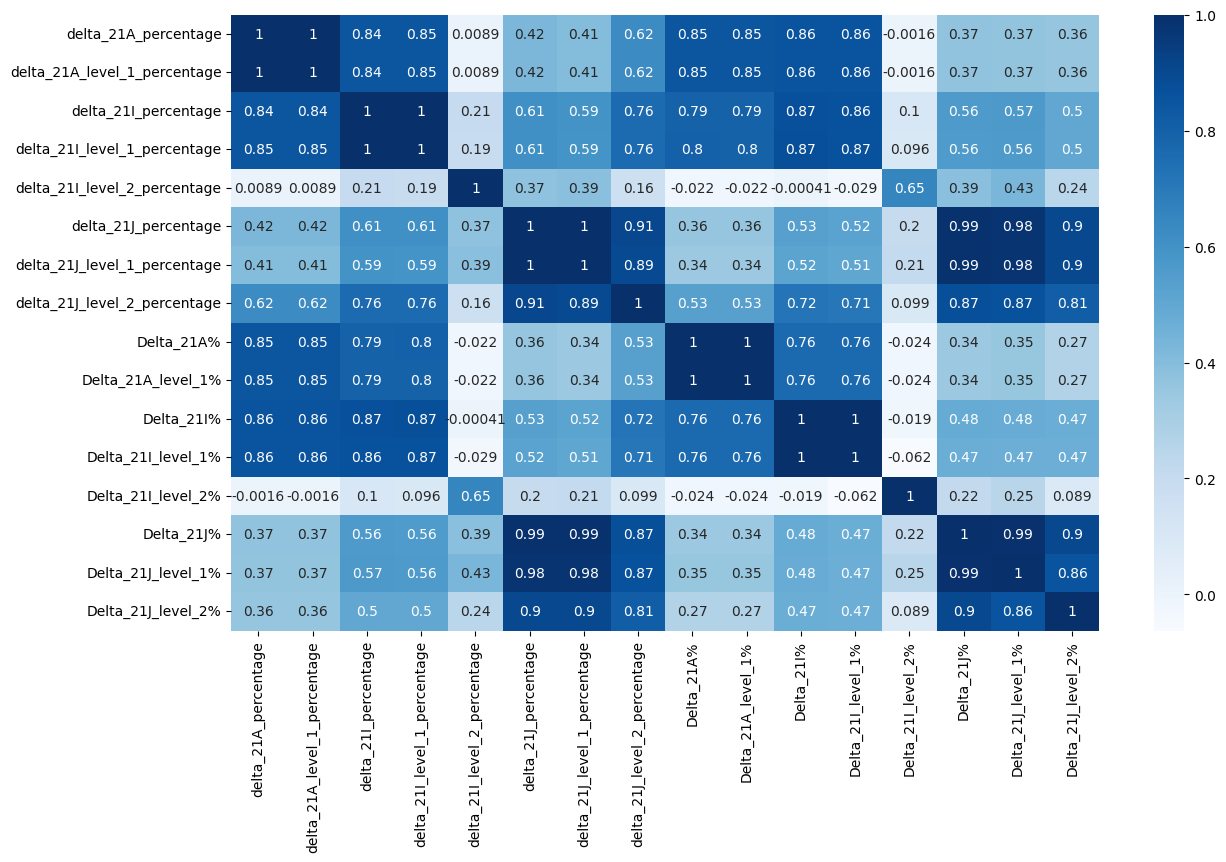

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

combined_study_cleandf.corr(numeric_only=True, method='spearman')
plt.figure(figsize=(14,8))
sns.heatmap(combined_study_cleandf.corr(numeric_only=True), annot=True, cmap='Blues')
